# Milestone 4 - Independent Project

## Author - Trupti Gandhi



## Instructions

1. Generate a clear statement problem and provide location for dataset
2. Provide a clear solution to the problem for a non-technical audience
3. Visually explore the data to generate insight and include summary statistics
4. Use an appropriate statistical analysis method
5. Prepare the data via cleaning, normalization, encoding, et cetera
6. Generate and evaluate a working model (hypothesis, linear, or time series)
7. Draw direct inferences and conclusions from model results
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables

#### Generate a clear statement problem and provide location for dataset 

A developer interest in acquiring properties in King County Washington is interested in what home features (zip code, structure, and so on) would yield a high price.

The objective of this workbook is to generate an optimal model based on statistical analysis with the tools available to estimate the best selling price for the client's home. 

In [549]:
# Load libraries
import os
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression

import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_context('notebook')
import pandas as pd

####  Location of dataset
 https://www.kaggle.com/harlfoxem/housesalesprediction/data 

The goal of this project was to use EDA, visualization, data cleaning, preprocessing, and use models to predict home prices given the features of the home.

In [550]:
House_data = pd.read_csv(r"C:\Users\Gandhi\Desktop\Method_For_Data_Analysys\Milestone4\kc_house_data.csv")
#Automobile.head(10)
#ad_data = pd.read_csv(filename, index_col=0)
print(House_data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955 

In [551]:
House_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [552]:
House_df= House_data.replace('[?]', np.NaN, regex = True)
print(House_df.isnull().sum())


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [553]:
House_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [554]:
print ("Summary\n")
feats = House_df.shape[1]
obs = House_df.shape[0]
print ("Number of Housing Features: ", feats)
print ("Number of Houses: ", obs)

Summary

Number of Housing Features:  21
Number of Houses:  21613



Some key things to notice here are:

- There are 21613 rows or cases in the data set.
- The data set has 21 variables or columns.
- Columns have a type of either object (character), float64 (floating point number), or int64 (integer). 

In [555]:
House_df.loc[:, 'date'] = pd.to_datetime(House_df.loc[:, 'date'])

In [556]:
House_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


 ### Data Exploration
 
Of the available features for a given home, which are significant and what do they measure? 


The main goal of this project is to construct a working model which has the capability of predicting the value/price of houses, we will need to investigate the dataset into features and the target variable. The features give us quantitative information about each data point. The target variable, 'price', will be the variable we seek to predict.

Let's find the relationship between each feature and Target.

First, a histogram is generated to show the distribution of housing prices

In [557]:
housing_prices = House_df.price

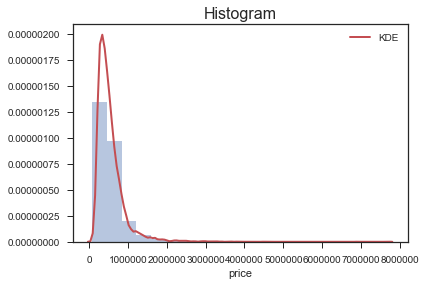

In [558]:
plt.title("Histogram",fontsize=16)
sns.distplot(housing_prices, kde=True,bins=20,color='b',
             kde_kws={"color": "r", "lw": 2, "label": "KDE"})
plt.show()

Price value are not normally distributed.

The histogram shows that the price of houses are skewed toward the lower end, with only a few high priced houses.

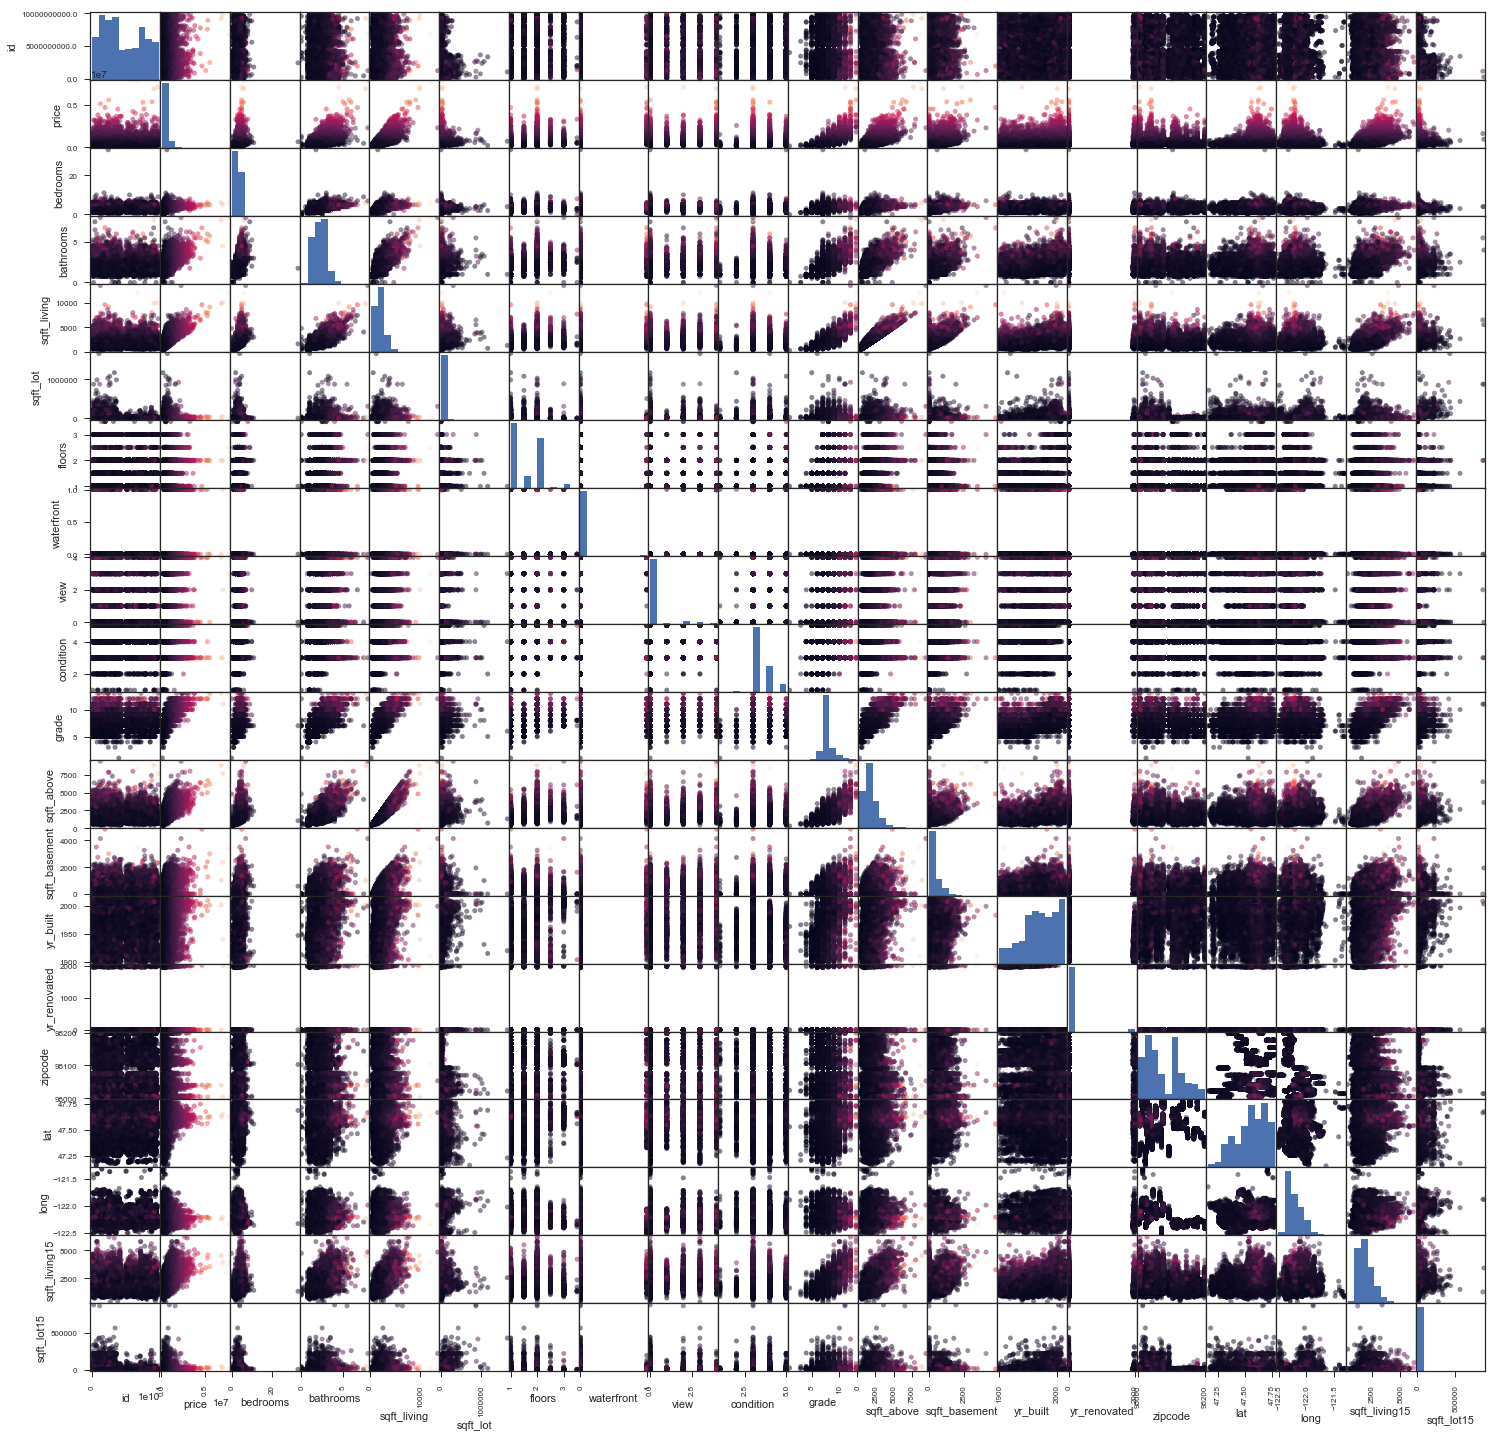

In [559]:
%matplotlib inline
_ = pd.plotting.scatter_matrix(House_df,c= House_df.loc[:,'price'], figsize=[25,25], s= 100)

- Most of the variables that deal with the actual physical space of the apartment are postively skewed — which makes sense.

- Price also has a similar positively skewed distribution — I hypothesize that the variables dealing with the actual dimensions of the apartment have a large impact on Sale Price.

- Many features do not have a strong relationship with Price, such as ‘Year Build’ and 'Year_ renovated'. However, a few variables, like Bathroom, Sqft_above and sqft_living are highly correlated with Sale Price

Let's concentrate on Bedrooms, find relationship between price and bedrooms. 



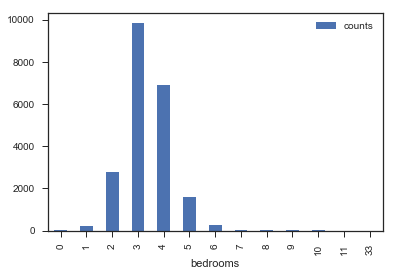

In [560]:
House_df['counts'] = 1
House_df[['counts', 'bedrooms']].groupby(['bedrooms']).agg('count').plot.bar()

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom. So how is it useful ? For a builder having this data , He can make a new building with more 3 and 4 bedroom’s to attract more buyers.

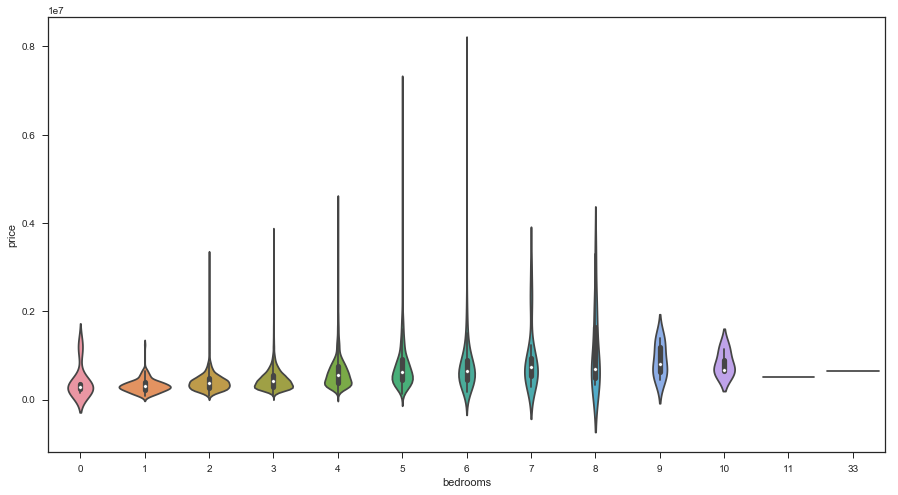

In [561]:
fig = plt.figure(figsize=(15,8)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'bedrooms', y = 'price', data = House_df, ax = ax)

Look at the bedroom columns , the dataset has a house where the house has 33 bedrooms , seems to be a massive house and would be interesting to know more about it as we progress.

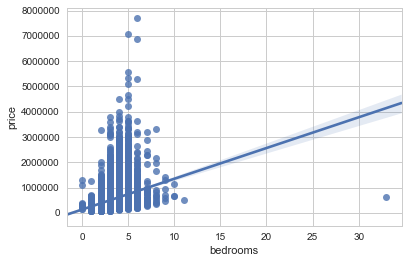

In [562]:
# library & dataset
import seaborn as sns

# use the function regplot to make a scatterplot
sns.regplot(x=House_df['bedrooms'], y=House_df['price'])

Reg plot shows linear relationship between price of the house and bedroom. 33 bedrooms house with less price , does not seems to be correct.

In [563]:
House_df[House_df.bedrooms == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15870  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view   ...    sqft_above  sqft_basement  \
15870      6000     1.0           0     0   ...          1040            580   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15870      1947             0    98103  47.6878 -122.331           1330   

       sqft_lot15  counts  
15870        4700       1  

[1 rows x 22 columns]

Zipcode of the house is 98103. 

- I am going to check the mean, max and min price for the same zip code. 
- I am going to check if this area is poor or not,  by checking number of bedrooms.(If you see number of bedrooms 1 or 2 , indicates poor area)

In [564]:
House_df_z = House_df[House_df.zipcode == 98103].bedrooms
House_df_z.unique()

array([ 4,  3,  5,  2,  6,  9,  1,  7, 33], dtype=int64)

In [565]:
House_df[House_df.zipcode == 98103].price.agg(['mean','max', 'min'])

mean    5.849192e+05
max     1.695000e+06
min     2.380000e+05
Name: price, dtype: float64

House price for this zipcode does not seem to be cheap. The maximum price of the house shows $ 1695000 in the same zipcode. It means the price for 33 bedroom is not correct. 

I am going to drop this price from our dataset.

This data point can be considered an outlier and has been removed.

In [566]:
House_df.drop(15870, inplace = True)

check the shape and reset the index 

In [567]:
House_df.shape

(21612, 22)

In [568]:
House_df = House_df.reset_index(drop=True)
House_df.head(2)

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view   ...    sqft_above  sqft_basement  \
0      5650     1.0           0     0   ...          1180              0   
1      7242     2.0           0     0   ...          2170            400   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   

   sqft_lot15  counts  
0        5650       1  
1        7639       1  

[2 rows x 22 columns]

In [569]:
# Checking the 33 bedroom row, which we have already dropped
House_df[House_df.bedrooms == 33]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, counts]
Index: []

[0 rows x 22 columns]

Text(0.5,1,'Checking proporsion of Orientation with Glazing Area')

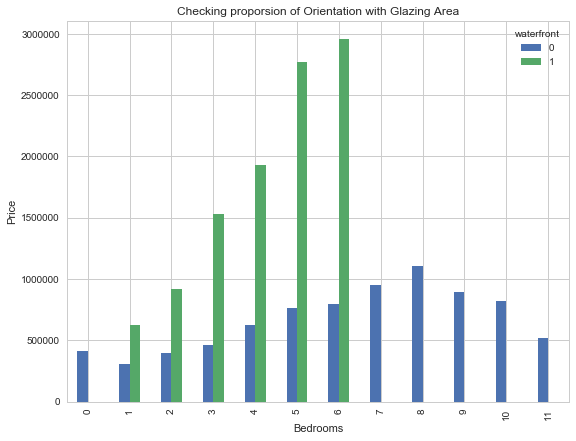

In [570]:
pd.pivot_table(House_df, values='price', columns='waterfront', index='bedrooms').plot.bar(figsize = (9,7))
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Checking proporsion of Orientation with Glazing Area')

This graph clearly shows that there is a linear relation between bedrooms, waterfront and prices. 

Waterfront houses are expensive with number of bedrooms or in other words as number of bedrooms increases with waterfront view, price of the house increases.


    Plotting the KDE plot for price after dropping the 33 bedroom set

Text(0,0.5,'Density')

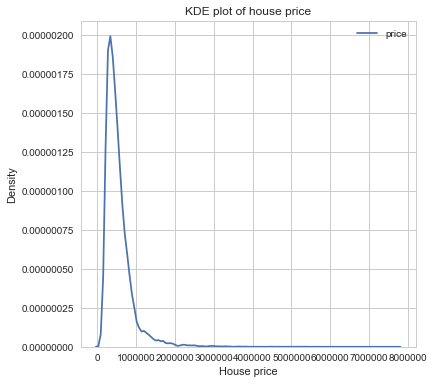

In [571]:
import seaborn as sns
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(House_df.loc[:, 'price'], ax = ax)
ax.set_title('KDE plot of house price') # Give the plot a main title
ax.set_xlabel('House price') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

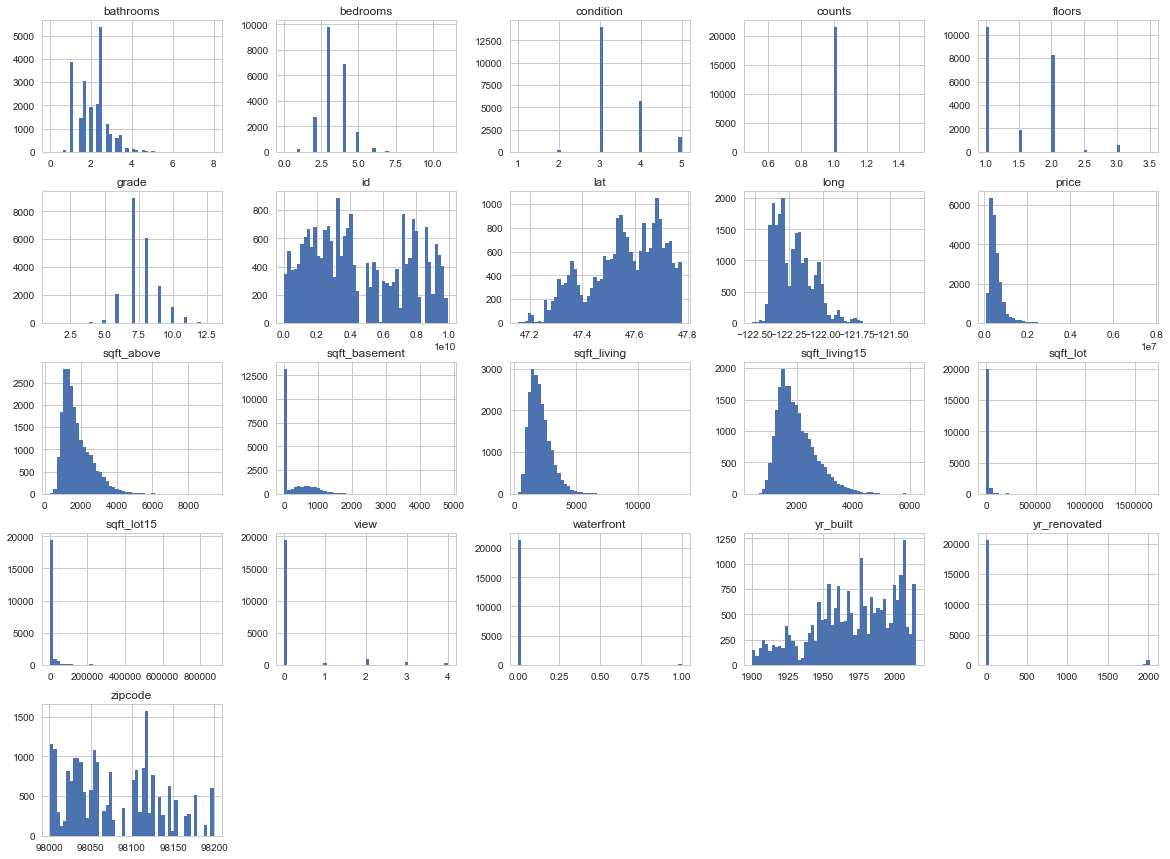

In [572]:
%matplotlib inline
import matplotlib.pyplot as plt
House_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Many histograms are right skewed: they extend much farther to the right of the median than to the left except few features.
year of build, Zip code and year_ renovated are left skewed. 

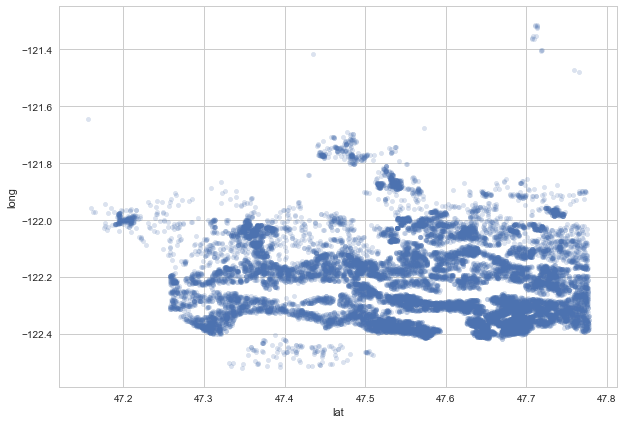

In [573]:
House_df.plot(kind="scatter", x='lat', y='long', alpha=0.2, figsize=(10,7))
plt.savefig('map1.png')

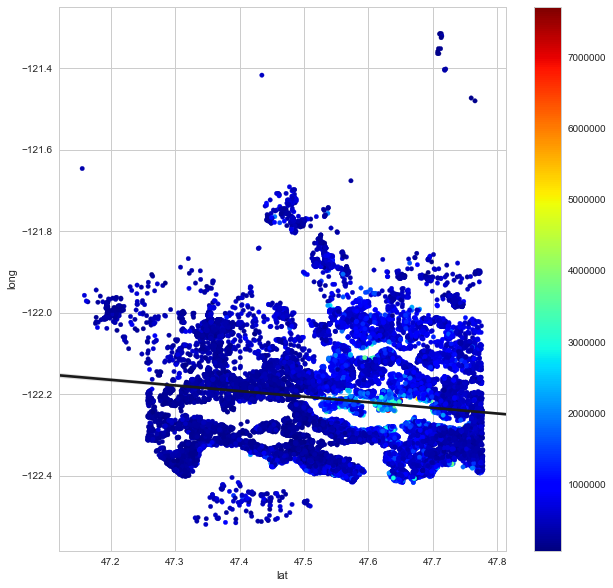

In [574]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

points = plt.scatter( House_df["lat"],  House_df["long"],
                     c= House_df["price"], s=20, cmap="jet")
plt.colorbar(points)

sns.regplot("lat", "long", data=House_df, scatter=False, color=".1")

# Alternative way
#House_df.plot(kind="scatter",x='lat', y='long', alpha=0.2, figsize=(20,10),c="price", cmap=plt.get_cmap("jet"), colorbar=True,sharex=False)
#plt.savefig('map2.png')

In [575]:
housing_date = House_df.date
housing_price = House_df.price
housing = House_df.loc[:, ['date','price']]

datetime_plot = pd.DataFrame(housing).set_index('date', drop=True)
datetime_plot.head()

price
date                
2014-10-13  221900.0
2014-12-09  538000.0
2015-02-25  180000.0
2014-12-09  604000.0
2015-02-18  510000.0

Text(0.5,1,'Time series of prices')

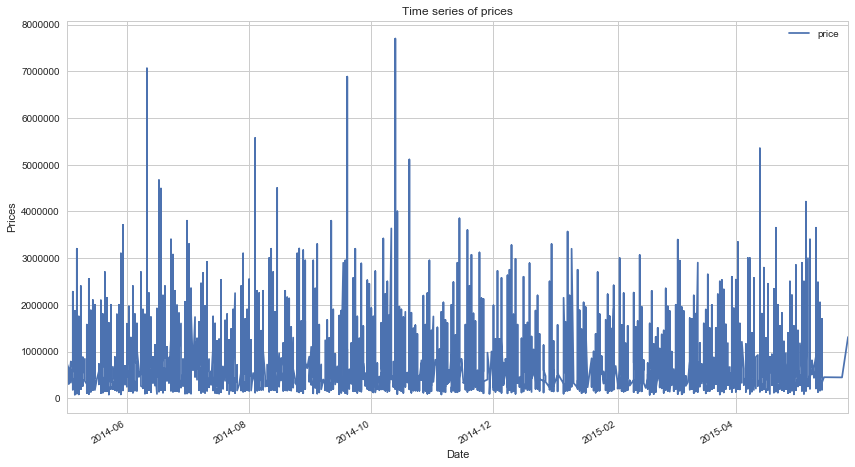

In [576]:
ax = plt.figure(figsize=(14,8)).gca() # define axis
datetime_plot.plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
ax.set_title('Time series of prices')

#Another method

#def plot_ts(ts, lab = ''):
#    ts.plot()
#    plt.title('Time series plot of ' + lab)
#    plt.ylabel('Value')
#    plt.xlabel('Date')
   
# plot_ts(datetime_plot)

There is no relation between time and price. We do not need to calculate more statistics on this.


Now let's check the relation between sqft_living15 and sqft_above. 


Text(0,0.5,'Density')

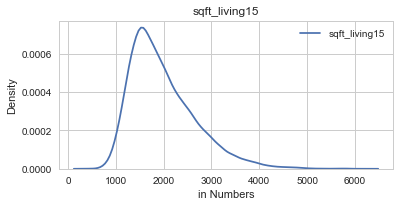

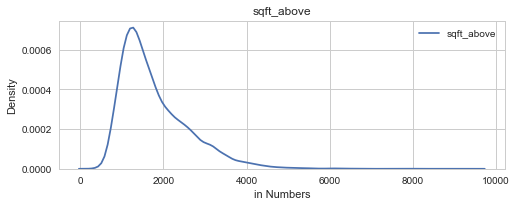

In [577]:
import seaborn as sns
fig = plt.figure(figsize=(6,6)) # define plot area
ax1 = plt.subplot(2,1,1);
sns.set_style("whitegrid")
sns.kdeplot(House_df.loc[:, 'sqft_living15'], ax = ax1)
ax1.set_title('sqft_living15') # Give the plot a main title
ax1.set_xlabel('in Numbers') # Set text for the x axis
ax1.set_ylabel('Density')# Set text for y axis

import seaborn as sns
fig = plt.figure(figsize=(8,6)) # define plot area
ax2 = plt.subplot(2,1,2);
sns.set_style("whitegrid")
#sns.regplot(x=House_df['sqft_above'], y=House_df['price'],ax = ax2)
sns.kdeplot(House_df.loc[:, 'sqft_above'], ax = ax2)
ax2.set_title('sqft_above') # Give the plot a main title
ax2.set_xlabel('in Numbers') # Set text for the x axis
ax2.set_ylabel('Density')# Set text for y axis




KDE plot for both "sqft_living15" and "sqft_above" shows similarity. Let's plot both the features against price.

Text(0,0.5,'Price')

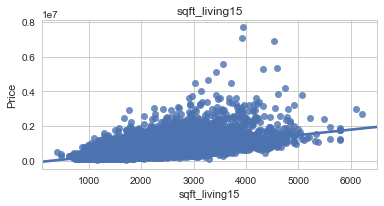

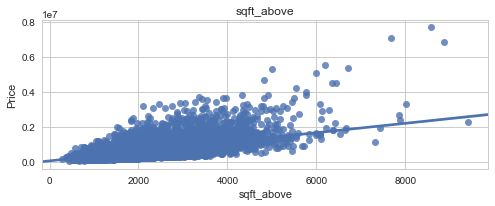

In [578]:
import seaborn as sns
fig = plt.figure(figsize=(6,6)) # define plot area
ax1 = plt.subplot(2,1,1);
sns.set_style("whitegrid")
sns.regplot(x=House_df['sqft_living15'], y=House_df['price'], ax = ax1)
ax1.set_title('sqft_living15') # Give the plot a main title
ax1.set_xlabel('sqft_living15') # Set text for the x axis
ax1.set_ylabel('Price')# Set text for y axis

import seaborn as sns
fig = plt.figure(figsize=(8,6)) # define plot area
ax2 = plt.subplot(2,1,2);
sns.set_style("whitegrid")
sns.regplot(x=House_df['sqft_above'], y=House_df['price'],ax = ax2)
ax2.set_title('sqft_above') # Give the plot a main title
ax2.set_xlabel('sqft_above') # Set text for the x axis
ax2.set_ylabel('Price')# Set text for y axis

Both of them are showing positive relation with price and Both  of these feature are likely distributed. Let's consider only one column for further calculation. 

I will pick **'sqft_above'** for further calculations. 




Let's discover relationship between bathrooms and price.

In [579]:
House_df['bathrooms'].unique()

array([ 1.  ,  2.25,  3.  ,  2.  ,  4.5 ,  1.5 ,  2.5 ,  1.75,  2.75,
        3.25,  4.  ,  3.5 ,  0.75,  4.75,  5.  ,  4.25,  3.75,  0.  ,
        1.25,  5.25,  6.  ,  0.5 ,  5.5 ,  6.75,  5.75,  8.  ,  7.5 ,
        7.75,  6.25,  6.5 ])

[ 250331.95759559   10687.95354767]


Text(0.5,1,'Checking relation between bathrooms with price')

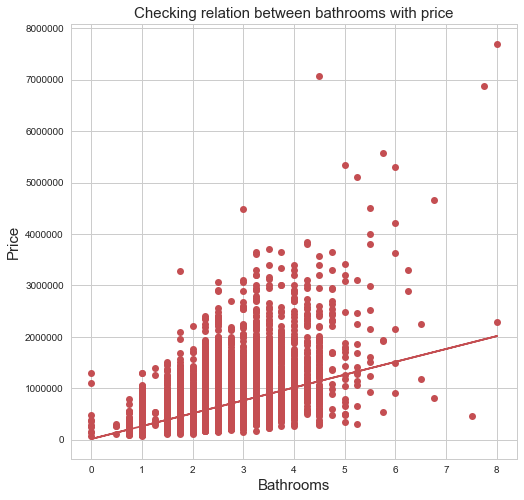

In [580]:
from scipy.interpolate import *
plt.rcParams["figure.figsize"] = (8,8)
x=House_df['bathrooms']
y=House_df['price']
p1 = np.polyfit(x,y,1)
print(p1)
plt.plot(x,y, 'ro')
plt.plot(x,np.polyval(p1,x), '-r')
plt.xlabel('Bathrooms', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Checking relation between bathrooms with price', fontsize = 15)

[ 127547.56913082  110315.7262782 ]


Text(0.5,1,'Checking relation between bathrooms with price')

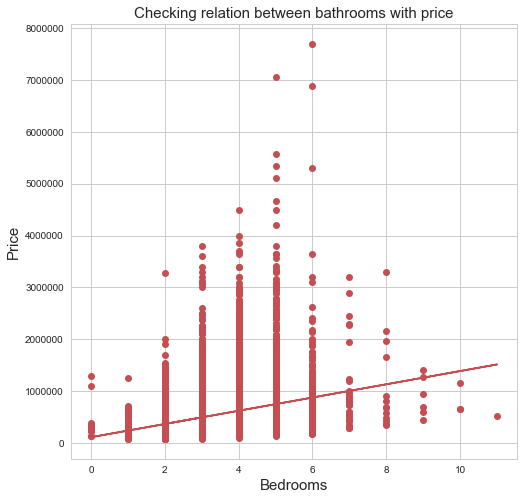

In [581]:
from scipy.interpolate import *
plt.rcParams["figure.figsize"] = (8,8)
x=House_df['bedrooms']
y=House_df['price']
p1 = np.polyfit(x,y,1)
print(p1)
plt.plot(x,y, 'ro')
plt.plot(x,np.polyval(p1,x), '-r')
plt.xlabel('Bedrooms', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Checking relation between bathrooms with price', fontsize = 15)

Bathrooms and Bedrooms have positive relation with price  but I am going to consider both the column.

Text(0.5,1,'Checking proporsion of Price with Condition')

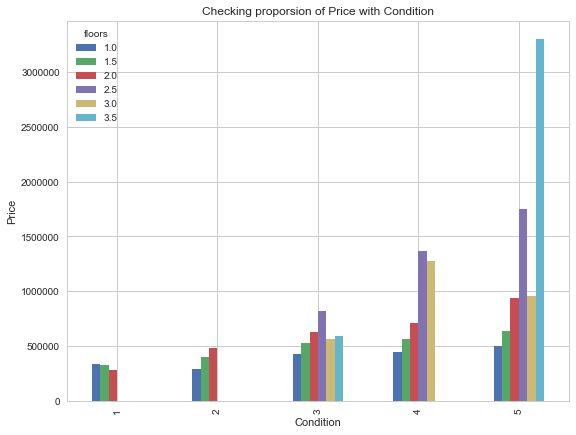

In [582]:
pd.pivot_table(House_df, values='price', columns='floors', index='condition').plot.bar(figsize = (9,7))
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Checking proporsion of Price with Condition')

Price is high for the good condition of the house with 3.5 rating floors. Price has positive relation with condition and floor. 

Zipcode can shows below points:

- Most expensive places
- Most populated places
- Min , Max and Mean price for the zipcode. 

Let's start with density plot against price to see the most expensive zipcodes.


Text(0,0.5,'zipcode')

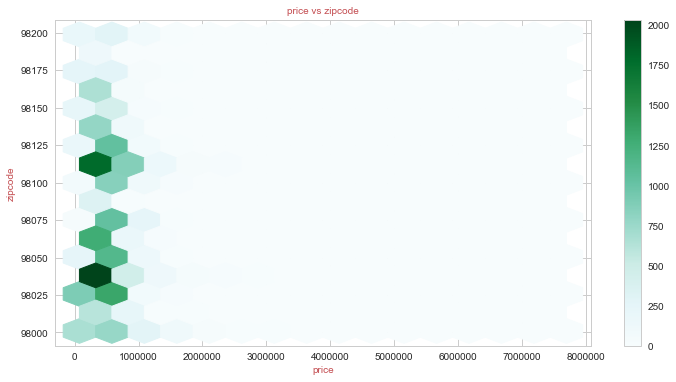

In [583]:
ax =plt.figure(figsize =(12,6)).gca()
House_df.plot.hexbin(x='price',y='zipcode',gridsize =15,ax=ax)
ax.set_title('price vs zipcode', fontsize =10, color = 'r') # Give the plot a main title
ax.set_xlabel('price',fontsize =10, color = 'r')# Set text for y axis
ax.set_ylabel('zipcode', fontsize =10, color = 'r')

Density plots shows us most popular zipcode in this area. Let's discover which are the famous / most populated zipcodes.

In [584]:
House_df['zipcode_str'] = House_df['zipcode'].astype(str)

In [585]:
House_df['zipcode_str'].describe()

count     21612
unique       70
top       98103
freq        601
Name: zipcode_str, dtype: object

In [586]:
Zipcode_count = pd.DataFrame(House_df.groupby('zipcode_str')["price"].agg(['count', 'min', 'max', 'mean']))
Zipcode_count.head()

count       min        max          mean
zipcode_str                                          
98001          362  100000.0   850000.0  2.808047e+05
98002          199   95000.0   389000.0  2.342840e+05
98003          280  128000.0   950000.0  2.941113e+05
98004          317  425000.0  7062500.0  1.355927e+06
98005          168  400000.0  1960000.0  8.101649e+05

In [587]:
print("Most famous 5 zipcodes....... ")
Zipcode_count.sort_values('count', ascending=False).head()

Most famous 5 zipcodes....... 


count       min        max           mean
zipcode_str                                           
98103          601  238000.0  1695000.0  584827.562396
98038          590  110000.0  1350000.0  366867.600000
98115          583  200000.0  2300000.0  619900.547170
98052          574  225000.0  2200000.0  645231.456446
98117          553  125000.0  1370000.0  576795.007233

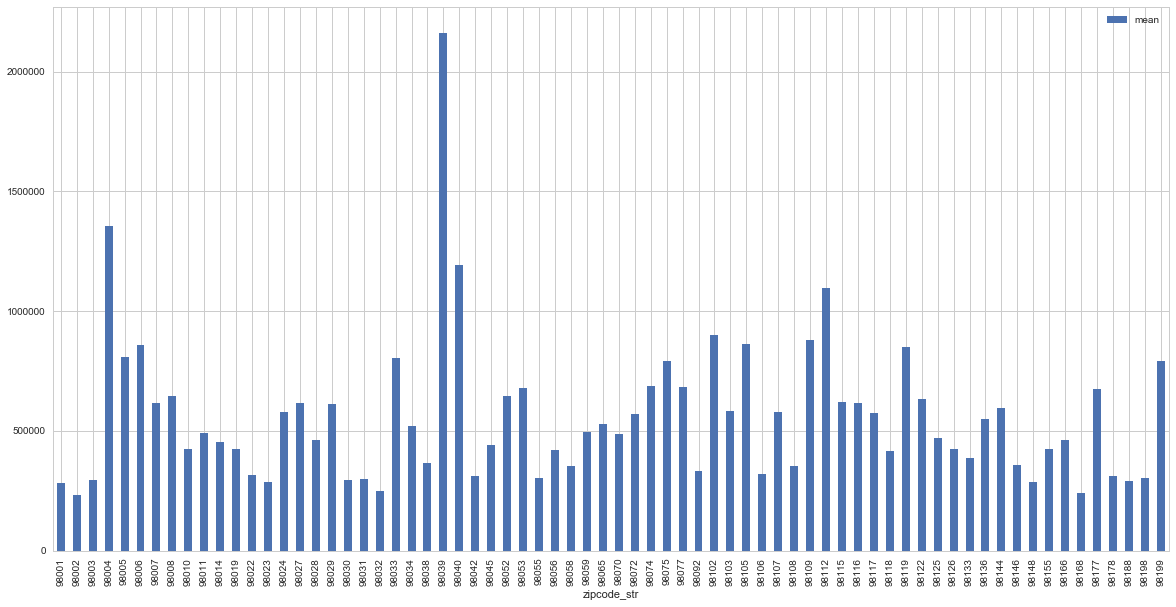

In [588]:
House_df.groupby('zipcode_str')["price"].agg(['mean']).plot.bar(figsize = (20, 10))

In [589]:
print("5 zipcodes with highest mean price....... ")
Zipcode_count.sort_values('mean', ascending=False).head()

5 zipcodes with highest mean price....... 


count       min        max          mean
zipcode_str                                          
98039           50  787500.0  6885000.0  2.160607e+06
98004          317  425000.0  7062500.0  1.355927e+06
98040          282  500000.0  5300000.0  1.194230e+06
98112          269  169317.0  3400000.0  1.095499e+06
98102          105  330000.0  7700000.0  9.012583e+05

Let's use heatmap to find more relations in dataset.

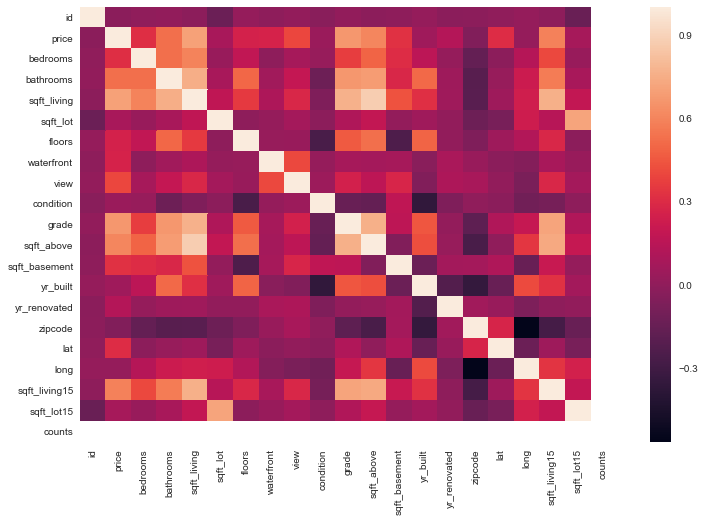

In [590]:
corr = House_df.corr()
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr,xticklabels = corr.columns.values, yticklabels = corr.columns.values)

The heatmap shows correlation for the whole data set against itself. Remember that the darker the red (positive correlation) or the darker the blue (negative correlation), the better.

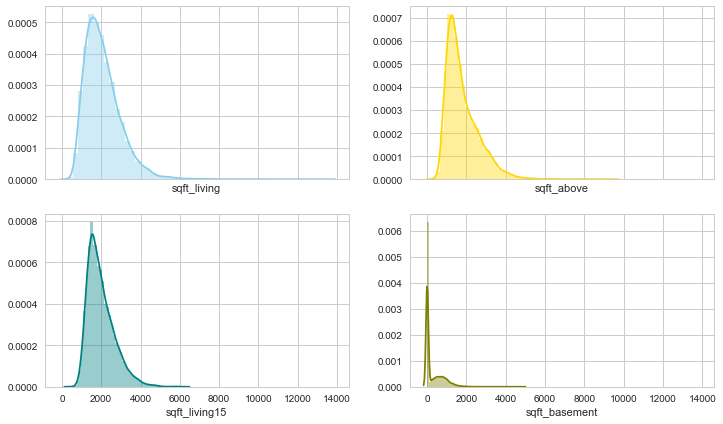

In [591]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# plot
f, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
sns.distplot( House_df['sqft_living'], color="skyblue", ax=axes[0, 0])
sns.distplot( House_df['sqft_basement'], color="olive", ax=axes[1, 1])
sns.distplot( House_df['sqft_above'], color="gold", ax=axes[0,1])
sns.distplot( House_df['sqft_living15'], color="teal", ax=axes[1, 0])

- SQft_living, sqft_above and sqft_living 15 have same density. 
- Sqft_basement shows different density.We will consider this feature for next calculation.

Text(0.5,0,'sqft_lot15')

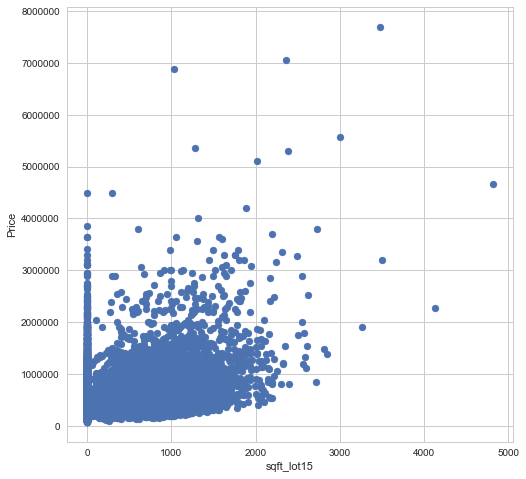

In [592]:
plt.scatter(x=House_df['sqft_basement'], y=House_df['price'])
plt.ylabel('Price')
plt.xlabel('sqft_lot15')

sqft_lot15 has positive corelation with price. First, the correlation is indeed very strong; you can clearly see the upward trend.

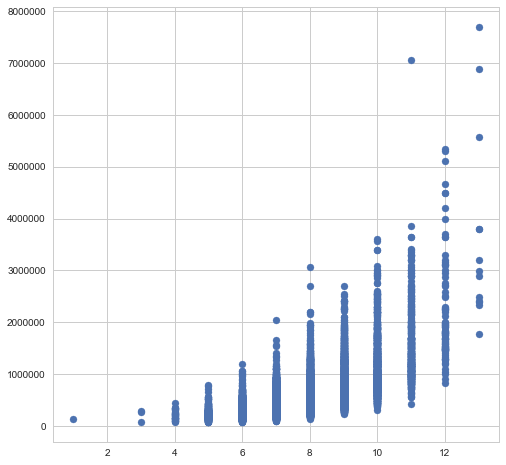

In [593]:
plt.scatter(x=House_df['grade'], y=House_df['price'])

price and grade have linear/ positive relation. 

Text(0.5,0,'sqft_lot')

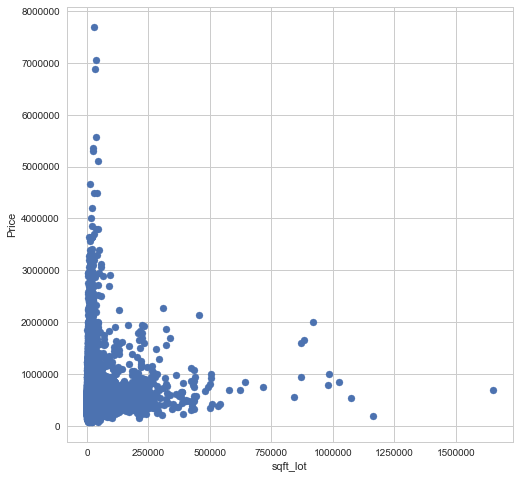

In [594]:
x = 'sqft_living'
y = 'price'
plt.scatter(x=House_df['sqft_lot'], y=House_df['price'])
plt.ylabel('Price')
plt.xlabel('sqft_lot')

- From the above figure we can see that more the living area , more the price though data is concentrated towards a particular price zone , but from the figure we can see that the data points seem to be in linear direction.


- We can also see some irregularities that the house with the highest square feet was sold for very less , maybe there is another factor involved here.

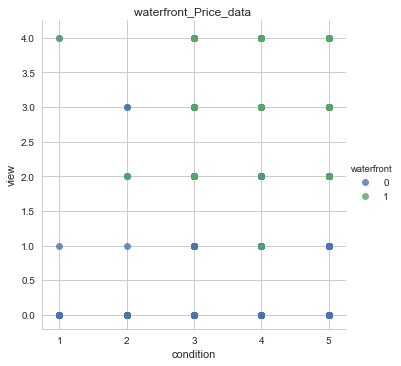

In [595]:
# creates the plot using
waterfront_Price_data = sns.lmplot(x = 'condition', y = 'view', data = House_df, hue = 'waterfront', fit_reg=False)

# set title
waterfront_Price_data .set(title = 'waterfront_Price_data ')

Looks like waterfront houses have very good view and good condition.

Text(0.5,1,'lat vs. Long \n with price by color')

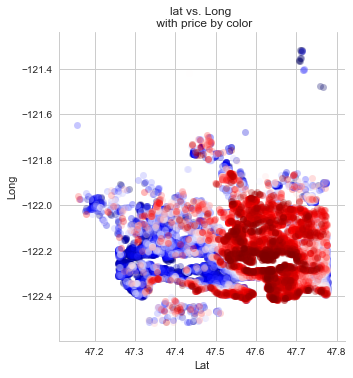

In [596]:
# better visibility
sns.lmplot(x='lat', y='long', 
           data = House_df,
           hue = "price",
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False,
           legend=None)
plt.xlabel('Lat')
plt.ylabel('Long')
plt.title('lat vs. Long \n with price by color')

 For latitude between -47.6 and -48.8 there are many houses , which would mean that maybe it’s an ideal location isn’t it ? But when we talk about longitude we can see that concentration is high between -122.2 to -122.4. Which would mean that most of the buy’s has been for this particular location.

### Feature Observation 

- Choosing the right features make all the difference. Bad feature with low correlation will just make the noise stronger than the signal, and leaving too many out would leave you with missing data.

- As we can see from all the above representation that many factors are affecting the prices of the house , like square feet which increases the price of the house and even location influencing the prices of the house.

- I am going to drop 2 features from our calculation,  year of build and year_ renovated.

In [640]:
import folium

In [598]:
#basic map
m = folium.Map(
    location=[47.5, -122.0], # center of map
    zoom_start=8, # initial zoom level max is 18, min is 1 
    tiles='Stamen Terrain' # tile style
)
m

### Statistical Analysis

statistical analysis can help us understanding our data more. Example : mean of 2 caregories are same means there is no difference between these 2 with target variable.


Implementation: Calculate Statistics
For my very first coding implementation, I will calculate descriptive statistics about housing prices. These statistics will be extremely important later on to analyze various prediction results from the constructed model

In [599]:
House_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161200e+04  2.161200e+04  21612.000000  21612.000000  21612.000000   
mean   4.580402e+09  5.400835e+05      3.369471      2.114774   2079.921016   
std    2.876594e+09  3.671351e+05      0.907982      0.770177    918.456818   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.218375e+05      3.000000      1.750000   1426.500000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161200e+04  21612.000000  21612.000000  21612.000000  21612.000000   
mean   1.510739e+04      1.494332      0.007542      0.234314      3.409356   
std    4.142142e+04      0.539991      0.086519      0.766334      0.650668   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.619000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068825e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

        ...       sqft_above  sqft_basement      yr_built  yr_renovated  \
count   ...     21612.000000   21612.000000  21612.000000  21612.000000   
mean    ...      1788.425319     291.495697   1971.006247     84.406163   
std     ...       828.094487     442.580931     29.373636    401.688123   
min     ...       290.000000       0.000000   1900.000000      0.000000   
25%     ...      1190.000000       0.000000   1951.000000      0.000000   
50%     ...      1560.000000       0.000000   1975.000000      0.000000   
75%     ...      2210.000000     560.000000   1997.000000      0.000000   
max     ...      9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  21612.000000  21612.000000  21612.000000   21612.000000   21612.000000   
mean   98077.938645     47.560047   -122.213891    1986.582871   12768.828984   
std       53.505993      0.138564      0.140829     685.392610   27304.756179   
min    98001.000000     47.155900   -122.519000     399.000000     651.000000   
25%    98033.000000     47.470975   -122.328000    1490.000000    5100.000000   
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000   
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.250000   
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000   

        counts  
count  21612.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0  

[8 rows x 21 columns]

Checking correlation of each feature: 

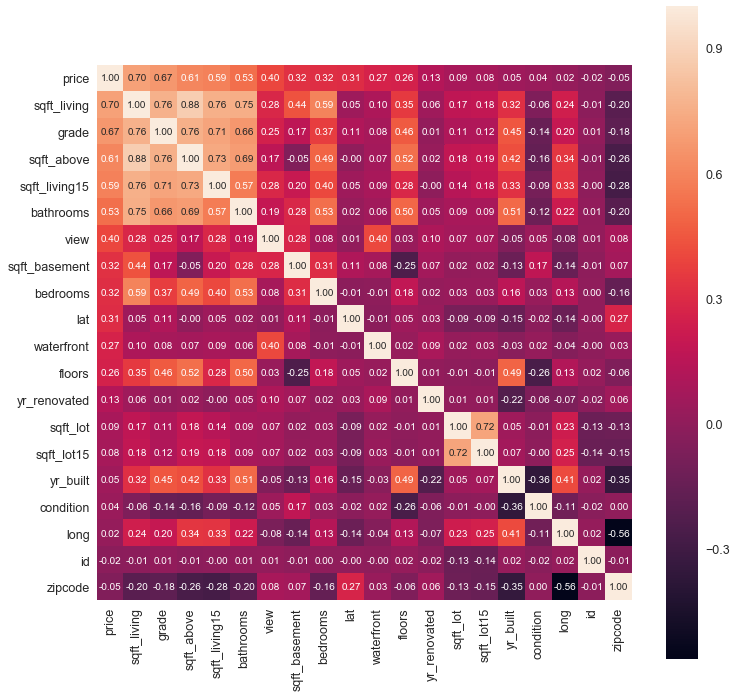

In [600]:
import numpy as np
#price correlation matrix
fig = plt.figure(figsize=(12,12))
k = 21 #number of variables for heatmap
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(House_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



**Price ** is important feature as this is a target. Let's get some more deatils on this by calculating the minimum, maximum, mean, median, and standard deviation.




##### Calculate some housing statistics


In [601]:

housing_prices = House_df.price
number_houses = House_df.shape[0] # size of data
number_features = House_df.shape[1] # number of features
min_price = np.min(housing_prices) # minimum price
max_price = np.max(housing_prices) # maximum price
mean_price = np.mean(housing_prices) # mean price
median_price = np.median(housing_prices)# median price
std_price = np.std(housing_prices)# standard deviation
    
print ("Number of houses:", number_houses)
print ("Number of features:", number_features)
print ("Minimum Housing Price: ${:,.2f}".format(min_price))
print ("Maximum Housing Price: ${:,.2f}".format(max_price))
print ("Mean Housing Price: ${:,.2f}".format(mean_price))
print ("Median Housing Price: ${:,.2f}".format(median_price))
print ("Standard Deviation: ${:,.2f}".format(std_price))

Number of houses: 21612
Number of features: 23
Minimum Housing Price: $75,000.00
Maximum Housing Price: $7,700,000.00
Mean Housing Price: $540,083.52
Median Housing Price: $450,000.00
Standard Deviation: $367,126.57


In [602]:
# converting price value into log 
House_df['log_price']= np.log(House_df['price'])

In [603]:
import numpy.random as nr
nr.seed(1357)
norm1 = House_df['price']
norm2 = House_df['log_price']

I will run a statistical analysis that assumes our dependent variable is **Normally distributed**, we can use a Normal Q-Q plot to check that assumption. It’s just a visual check, not an air-tight proof, so it is somewhat subjective. But it allows us to see at-a-glance if our assumption is plausible, and if not, how the assumption is violated and what data points contribute to the violation

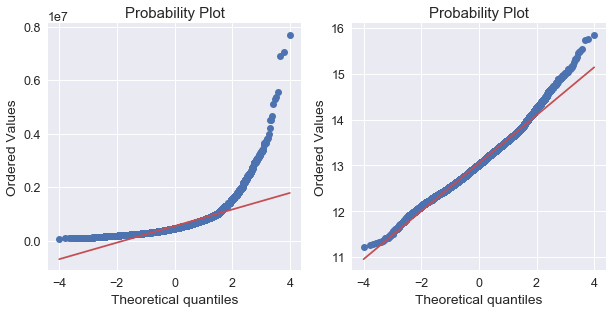

In [604]:
# Checking the distribution using Q-Q plot
def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(10, 10)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
qq_plot(norm1, norm2) 

- The curved pattern in fig. 1 st suggests that the price value are not normally distributed.

- The curved pattern in fig. 2 nd suggests that the log price value is closed to normally distribution but not exact straight line.

- Normal Q-Q plots that look like fig.2 , usually mean your sample data are skewed. 

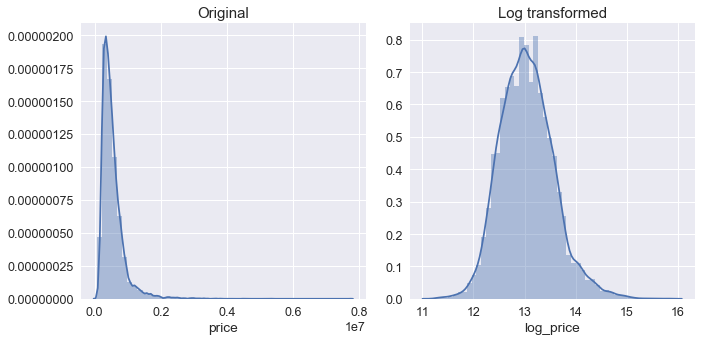

In [605]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(norm1, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(norm2, bins=50)
plt.title('Log transformed')

plt.tight_layout()

In [606]:
print('Original price')
print(norm1.skew())
print(norm1.kurt())

Original price
4.02403359565
34.5842618477


In [607]:
print('log price')
print(norm2.skew())
print(norm2.kurt())

log price
0.428147838037
0.691852326924


### Central Limit Theorm

I am going to apply central theorm on price feature from house data where values are not normaly distributed. But using central Limit Theorm, we can prove the distribution of the mean of the sample will be Normal.

In [608]:
x = House_df['log_price']

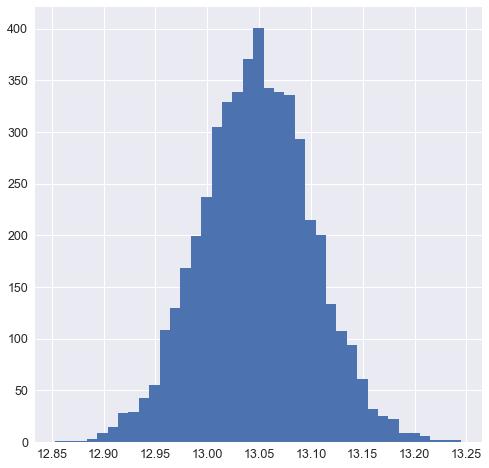

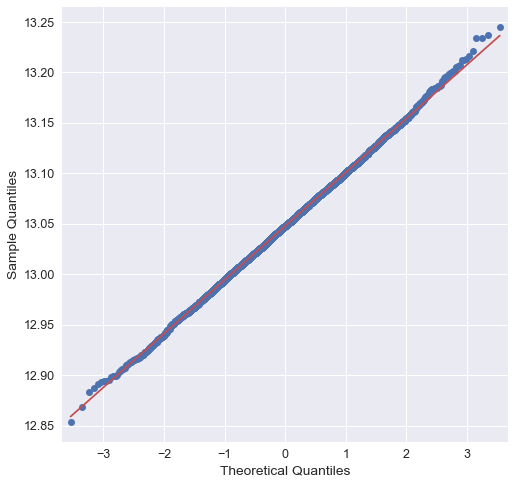

In [609]:
import numpy
from matplotlib import pyplot
import statsmodels.api as sm
x_means = numpy.array([
        numpy.random.choice(x, size=100, replace=True).mean() # choose 50 random samples from the distribution and take the mean
        for i in range(5000)]) # do this 500 times

breaks = numpy.linspace(x_means.min(), x_means.max(), num=40)
_ = pyplot.hist(x_means, bins=breaks)
_ = sm.qqplot(x_means, line='s') # standardized line, the expected order statistics are scaled by 
                                 # the standard deviation of the given sample and have the mean added to them

#####  The distribution of the sample means is close to Normal, even though the population is not.

In [610]:
pop_mean = x_means.mean()
pop_std = x_means.std()
print('Estimated mean (%.3f) vs actual mean (%.3f)' % (pop_mean, x.mean()))
print('sample mean s.d. (%.3f) vs data s.d. (%.3f)' % (pop_std, x.std())) # these standard devations are meant to be different
                                                                          # one is the standard deviation of the samples,
                                                                          # the other is the standard deviation of the sample means
                                                                          # it makes sense the sample means would have less variance

Estimated mean (13.048) vs actual mean (13.048)
sample mean s.d. (0.053) vs data s.d. (0.527)


Please notice **estimated mean and actual mean** are same.

In [611]:
import scipy
import scipy.stats as ss
alpha = 0.05 # significance level
half_width = scipy.stats.norm.ppf(1-alpha/2, loc=pop_mean, scale=pop_std) - pop_mean
print('The half width is %.2f' % half_width)

ci_low = pop_mean - half_width
ci_high = pop_mean + half_width

print('The actual mean is %.2f' % x.mean())
print('The %d CI is (%.2f , %.2f)' % (100*(1-alpha), ci_low, ci_high))

The half width is 0.10
The actual mean is 13.05
The 95 CI is (12.94 , 13.15)


### T-test 

I am going to use **t-test** to check if there is difference in prices for waterfront houses and no-waterfront houses.

#### H0 =The difference of means is not significant .

#### Ha= The difference of means is significant for waterfront house and no-waterfront house.

In [612]:
House_df['waterfront'].unique()

array([0, 1], dtype=int64)

Text(0,0.5,'price')

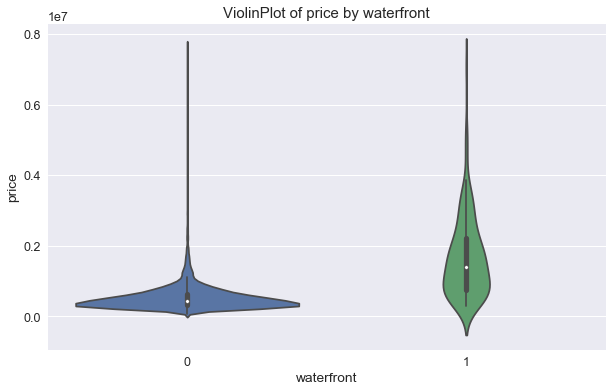

In [613]:
fig= plt.figure(figsize=(10,6))
ax=fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x ='waterfront',y ='price', data=House_df , ax=ax)
ax.set_title('ViolinPlot of price by waterfront') # Give the plot a main title
ax.set_xlabel('waterfront') # Set text for the x axis
ax.set_ylabel('price')# Set text for y axis

The price for the houses with no waterfront and waterfront overlap quite a lot. The outliers of price for all are clearly visible. The median (white dot) for no waterfront is low compared to the houses with waterfront. Inner quartiles range and wiskers at +/-2.5 of the IQR for all conditions have overlapped in small portion.

In [644]:
No_waterfront =House_df.loc[House_df.loc[:,'waterfront'] == 0, 'price']
waterfront = House_df.loc[House_df.loc[:,'waterfront'] == 1,'price']
len(No_waterfront), len(waterfront)


(21449, 163)

In [615]:
#Cross validate data with below function:
def count_mean(dat):
    import numpy as np
    import pandas as pd
    groups = dat.groupby('waterfront') # Create the groups
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 
                        'mean': groups.aggregate(np.mean).loc[:, 'price']})
   
count_mean(House_df)

count          mean
waterfront                     
0           21449  5.315585e+05
1             163  1.661876e+06

In [645]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)     

In [646]:
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Price')

def plot_t(a, b, t_test, cols=['No_waterfront','waterfront'], nbins = 20):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

DegFreedom    1.622290e+02
Difference   -1.130317e+06
Statistic    -4.062521e+01
PValue        0.000000e+00
Low95CI      -1.303667e+06
High95CI     -9.569683e+05
dtype: float64


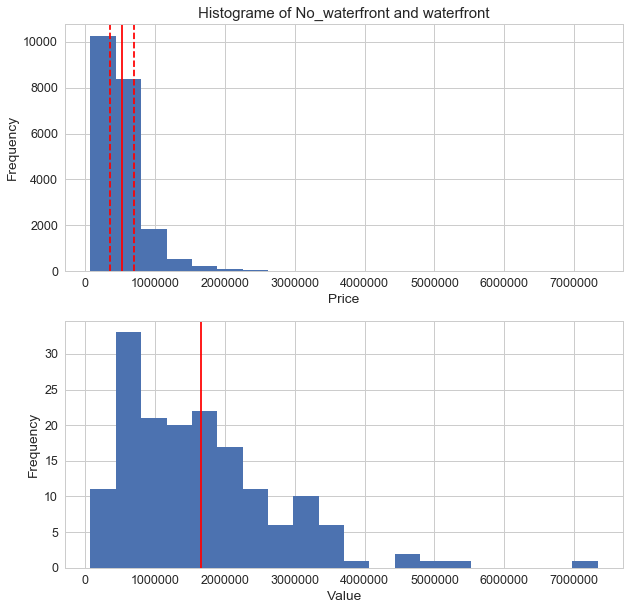

In [647]:
Waterfront_house = t_test(No_waterfront,waterfront, alpha = 0.05)
print(Waterfront_house)
plot_t(No_waterfront,waterfront, Waterfront_house) 

#### Examine these statistics noticing the following:
- Difference in means is very large.
- t-statistic is small and the p-value is large too. 


- Based at the above statistics we can reject the null hypothesis. 

- Notice that the mean of the population in the lower plot is not within the confidence interval of the difference of means of the population. This confirms that we can reject the null hypothesis that there is no significant difference in these means. 

We are going to consider **Waterfront** feature for further calculation. This definetly showing effect on prices.

### Anova test 

Using anova test we will determine if condition of the house is important or not.

Let's plot the graph to get some idea about condition of the house.

In [621]:
Bedroom_condition = pd.crosstab(index=House_df["bedrooms"], 
                          columns=House_df["condition"])
print(Bedroom_condition) 

condition   1   2     3     4    5
bedrooms                          
0           1   1    10     1    0
1           4  11   124    48   12
2          12  51  1779   718  200
3           8  69  6308  2711  728
4           4  36  4580  1682  580
5           0   1  1031   418  151
6           1   3   158    87   23
7           0   0    25     9    4
8           0   0     8     3    2
9           0   0     6     0    0
10          0   0     1     2    0
11          0   0     1     0    0


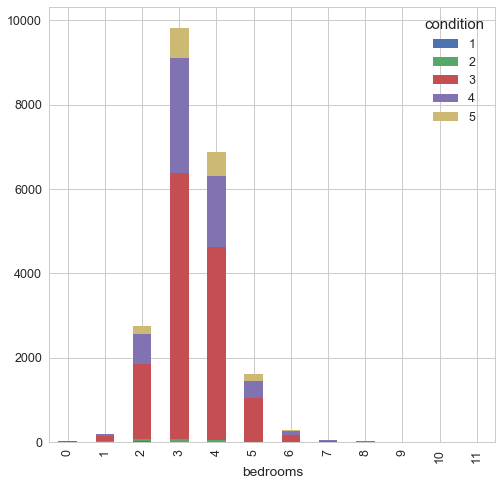

In [622]:
Bedroom_condition.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

Text(36.9281,0.5,'Price')

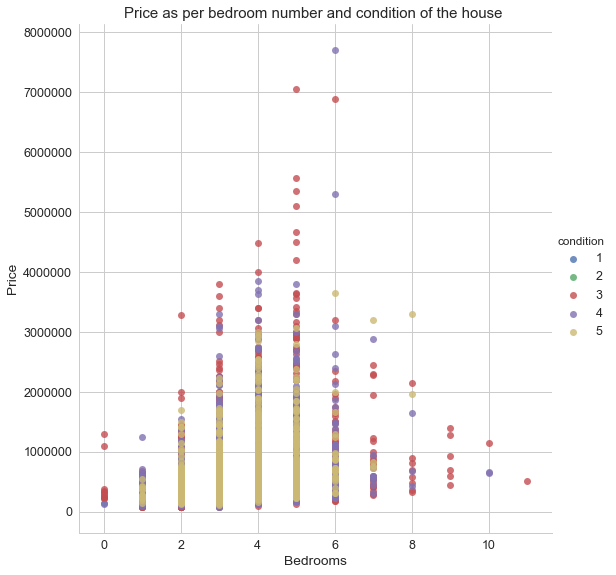

In [623]:
plt.figure(figsize=(10,10))
# creates the plot using
Price_Bedroom_condition = sns.lmplot(x = 'bedrooms', y = 'price', data = House_df, hue = 'condition', fit_reg=False,size=8,
                                     scatter_kws={'alpha':0.8},)

# set title
Price_Bedroom_condition.set(title = 'Price as per bedroom number and condition of the house ')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

C:\Users\Gandhi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


(0.0, 2000000)

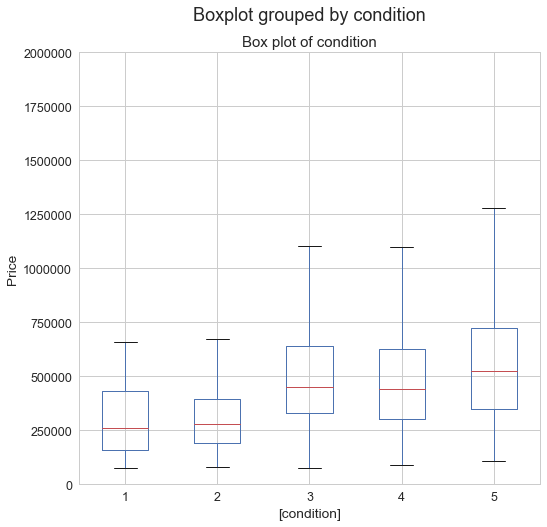

In [624]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8)) # define plot area
ax = fig.gca() # define axis 
House_df.loc[:,['price', 'condition']].boxplot(by = 'condition', ax = ax)
ax.set_title('Box plot of condition') # Give the plot a main title
ax.set_ylabel('Price')# Set text for y axis
ax.set_ylim(0.0, 2000000) # Set the limits of the y axis

#### H0 =The difference of means in the condition of the house is not significant .

#### Ha= The difference of means of the condition of the house is significant.

In [625]:
#Converting the column into string just for Anova testing
House_df["condition"]= House_df["condition"].astype(str)

In [626]:
Poor_condition = House_df.loc[House_df['condition'] == '1' , ['price']]
okay_condition = House_df.loc[House_df['condition'] == '2' , ['price']]
Nice_condition = House_df.loc[House_df['condition'] == '3' , ['price']]
Good_condition = House_df.loc[House_df['condition'] == '4' , ['price']]
Great_condition = House_df.loc[House_df['condition'] == '5' , ['price']]

In [627]:
import scipy.stats as ss
f_statistic, p_value = ss.f_oneway(Poor_condition,okay_condition,Nice_condition,Good_condition,Great_condition)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = [ 37.39259934]
P-value = [  3.23390362e-31]


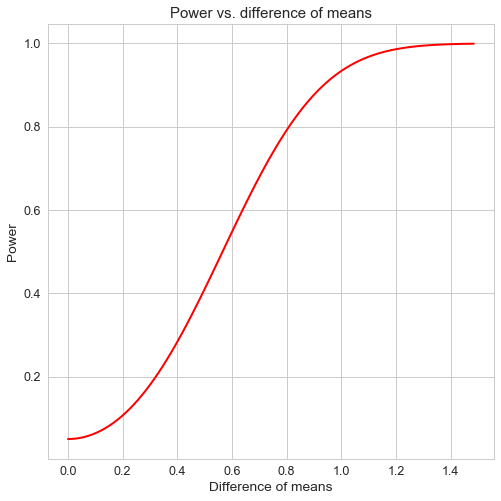

In [628]:
import statsmodels.stats.power as smsp
import numpy as np
nr.seed(seed=23344)
diffs = np.arange(start = 0.0, stop = 1.5, step = .015)
x = 5
powers = [smsp.tt_ind_solve_power(effect_size = x, 
                                  nobs1 = 25, # number of observations 
                                  alpha = 0.05, # significance level
                                  power = None, 
                                  ratio = 1.0, # ratio of sample 1 size to sample 2 size 
                                  alternative = 'two-sided') 
          for x in diffs]


def plot_power(x, y, xlabel, title):
    import matplotlib.pyplot as plt
    plt.plot(x, y, color = 'red', linewidth = 2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Power')
plot_power(diffs, powers, xlabel = 'Difference of means', title = 'Power vs. difference of means')

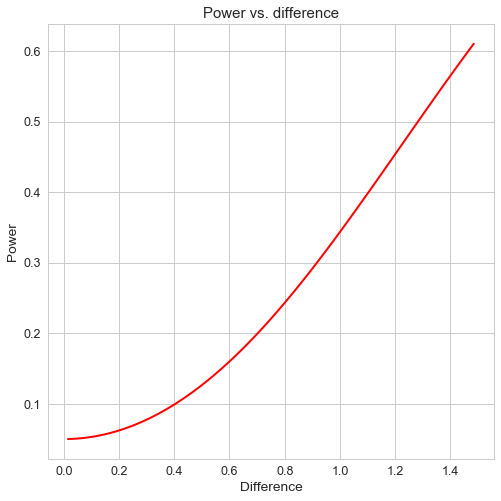

In [629]:
from math import sqrt
import statsmodels.stats.power as ssp
diffs = np.arange(start = 0.0, stop = 1.5, step = .015)
powers = ssp.FTestAnovaPower().solve_power(effect_size = diffs, nobs=5, alpha=0.05)
plot_power(diffs, powers, xlabel = 'Difference', title = 'Power vs. difference')




The F-Statistic is fairly large and the p-value is small. We can reject the null hypothesis that the 5 variables have the same mean, as the probability of the differences arrising from random chance is quite low. 

We have to consider the **Condition** feature as part of model.

In [630]:
#Converting the column back to int just 
House_df["condition"]= House_df["condition"].astype(int)
House_df["condition"].dtype

dtype('int32')

#### Tukey's HSD test 

Let's see if prices increses with the bedroom number. To verify this we will use the Tukey Method.

In [631]:
data =  House_df[['view','price']]

In [632]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison( data['price'], data['view'],)
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)


    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower       upper     reject
---------------------------------------------------------
  0      1    315724.0055 265164.3835 366283.6274   True 
  0      2     295844.056  265688.651 325999.4609   True 
  0      3    475408.4426  434432.474 516384.4112   True 
  0      4    967154.4063 915591.7784 1018717.0343  True 
  1      2    -19879.9495 -78017.5855  38257.6865  False 
  1      3    159684.4372  95266.5338 224102.3406   True 
  1      4    651430.4009  579810.984 723049.8178   True 
  2      3    179564.3867 129537.0006 229591.7727   True 
  2      4    671310.3504 612298.3689 730322.3319   True 
  3      4    491745.9637 426537.8698 556954.0576   True 
---------------------------------------------------------
[0 1 2 3 4]


<class 'statsmodels.iolib.table.SimpleTable'>

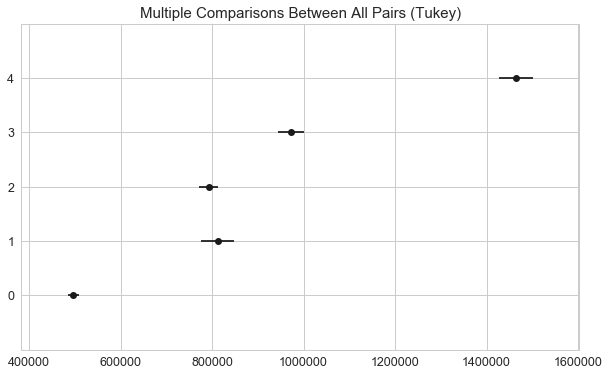

In [633]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=data['price'],     # Data
                          groups=data['view'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=18000,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()   

- The output of the Tukey test shows the average difference, a confidence interval as well as whether you should reject the null hypothesis for each pair of groups at the given significance level. 

- In this case, the results above reveal that all of them are significatly different except 1 and 2.. The last column tells us that there is significant evidence to reject the null hypothesis for all groups except one.

#### Bootstrap Method 

let's use Bootstrap Methodon floor feature.We will bootstrap the means of the prices of different populations from house data.

Assume the null hypothesis: 

#### H0 =The difference of means in the floor of the house is not significant .

#### Ha= The difference of means of the floor of the house is significant.


Text(0,0.5,'Price')

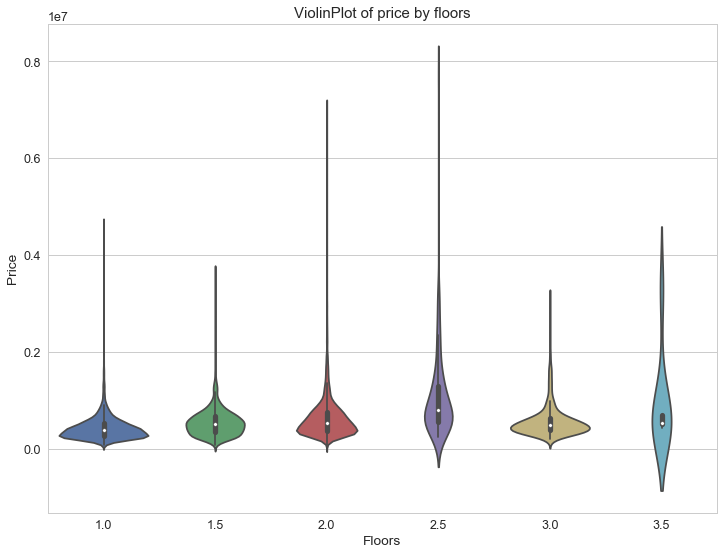

In [634]:
fig= plt.figure(figsize=(12,9))
ax=fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x ='floors',y ='price', data = House_df , ax=ax)
ax.set_title('ViolinPlot of price by floors') # Give the plot a main title
ax.set_xlabel('Floors') # Set text for the x axis
ax.set_ylabel('Price')# Set text for y axis

In [635]:
one = House_df[House_df['floors'] == 1]
one_point_five = House_df[House_df['floors'] == 1.5]
two = House_df[House_df['floors'] == 2]
two_point_five = House_df[House_df['floors'] == 2.5]
three = House_df[House_df['floors'] == 3]
three_point_five = House_df[House_df['floors'] == 3.5]


In [636]:
def plot_hist(x, bins, p=5):
    # Plot the distribution and mark the mean
    pyplot.hist(x, alpha=.5, bins=bins)
    pyplot.axvline(x.mean())
    # central 100*(1-p)% of data   
    pyplot.axvline(numpy.percentile(x, p/2.), color='red', linewidth=3)
    pyplot.axvline(numpy.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, c,d,e,f,nbins, a_label='pop_A', b_label='pop_B', c_label='pop_c',
               d_label='pop_d',e_label='pop_e',f_label='pop_f', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pandas.concat([a, b,c,d,e,f])
    #create a series of bins
    breaks = numpy.linspace( 
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    fig= plt.figure(figsize=(14,14))
    
    pyplot.subplot(6, 1, 1)
    plot_hist(a, bins=breaks)
    pyplot.title(a_label)
    
    pyplot.subplot(6, 1, 2)
    plot_hist(b, bins=breaks)
    pyplot.title(b_label)
    
    pyplot.subplot(6, 1, 3)
    plot_hist(c, bins=breaks)
    pyplot.title(c_label)
    
    pyplot.subplot(6, 1, 4)
    plot_hist(d, bins=breaks)
    pyplot.title(d_label)
    
    pyplot.subplot(6, 1, 5)
    plot_hist(e, bins=breaks)
    pyplot.title(e_label)
    
    pyplot.subplot(6, 1, 6)
    plot_hist(f, bins=breaks)
    pyplot.title(f_label)
        
 
    pyplot.tight_layout() # cleaner plot layout

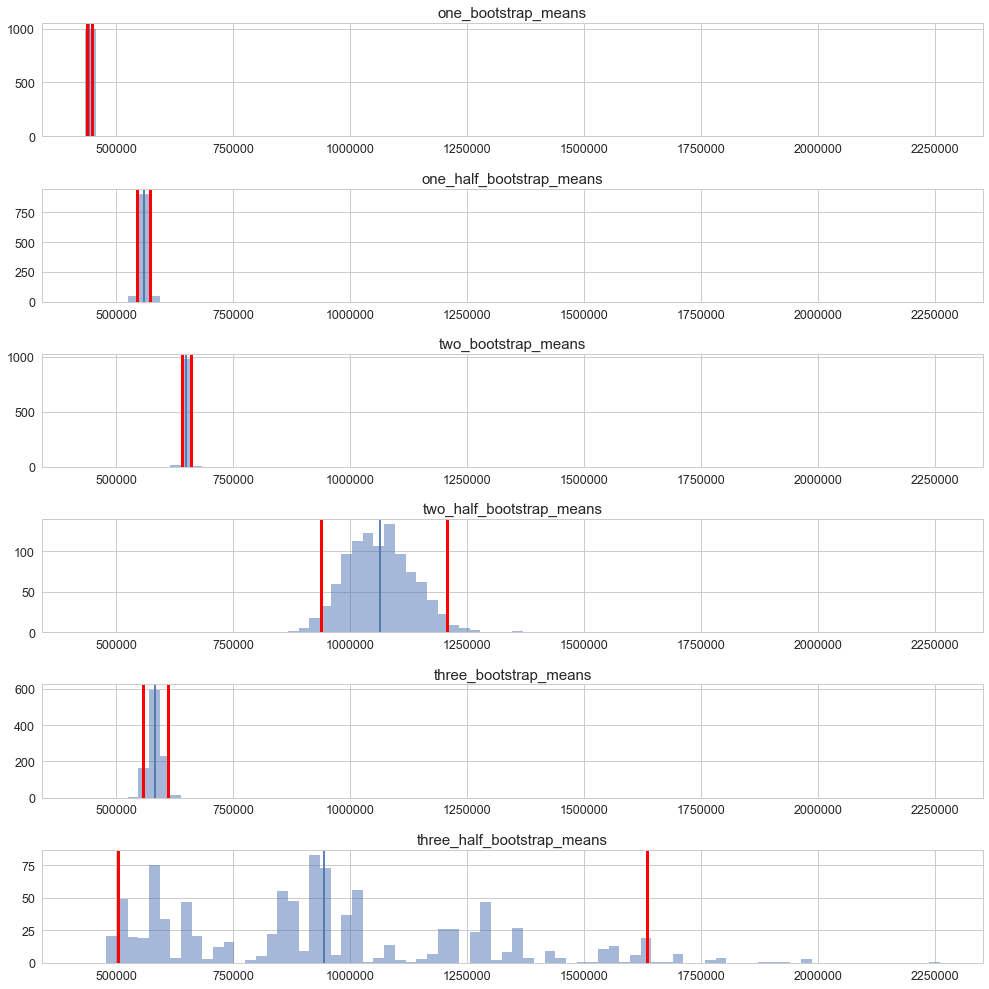

In [649]:
import pandas
n_replicas = 1000 # look at this many re-samples 

#genetate a series of re-sample means
one_bootstrap_means = pandas.Series([
    one.sample(frac=1, replace=True).price.mean()# take the mean of each sample
    for i in range(n_replicas)])

one_half_bootstrap_means = pandas.Series([
        one_point_five.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

two_bootstrap_means = pandas.Series([
        two.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

two_half_bootstrap_means = pandas.Series([
        two_point_five.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

three_bootstrap_means = pandas.Series([
        three.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

three_half_bootstrap_means = pandas.Series([
        three_point_five.sample(frac=1, replace=True).price.mean()# take the mean of each sample
        for i in range(n_replicas)])

plot_dists(one_bootstrap_means,one_half_bootstrap_means, two_bootstrap_means,two_half_bootstrap_means,three_bootstrap_means,
           three_half_bootstrap_means, nbins=80, 
           a_label='one_bootstrap_means', b_label='one_half_bootstrap_means', c_label='two_bootstrap_means',
           d_label='two_half_bootstrap_means', e_label='three_bootstrap_means', f_label='three_half_bootstrap_means')


The distribution of the bootstrap means do not overlap at all. Evidently,** the difference is significant. **

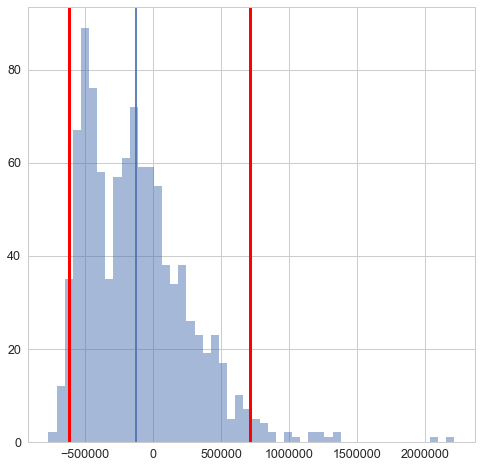

In [651]:
diffs = []
for i in range(n_replicas):
    sample = House_df.sample(frac=1, replace=True)
    two_half_sample_mean = sample[sample['floors']== 2.5].price.mean()
    three_half_sample_mean = sample[sample['floors']== 3.5].price.mean()
    diffs.append(three_half_sample_mean- two_half_sample_mean )
diffs = pandas.Series(diffs)

plot_hist(diffs, bins =50)

The distribution of the difference in means is close to zero. As before, we can infer that the means of the two populations are significantly different. 

Let's check the difference in median:


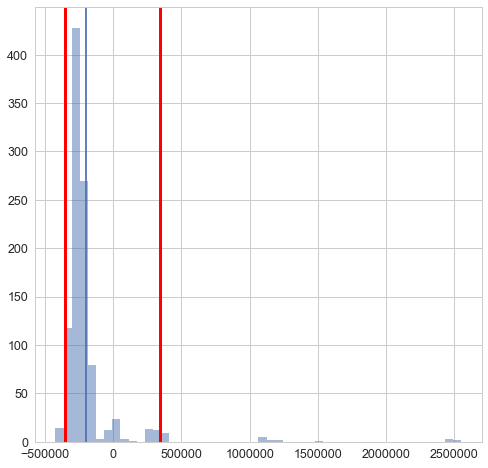

In [652]:
diffs = []
for i in range(n_replicas):
    sample = House_df.sample(frac=1, replace=True)
    two_half_sample_median = sample[sample['floors']== 2.5].price.median()
    three_half_sample_median = sample[sample['floors']== 3.5].price.median()
    diffs.append(three_half_sample_median - two_half_sample_median )
diffs = pandas.Series(diffs)

plot_hist(diffs, bins =50)

The chart shows that the bootstrap distribution of the difference in medians. The **confidence interval doesn't overlaps zero**, so we must not accept the null hypothesis that the difference in medians is zero.


#### ** Floor ** shows the significant difference between mean and median which indicates that the price changes with the change in the floor value. 

### Bayesian method

Let's check if there is any price difference when house is renovated. I ahve converted the yr_renovated column into 2 category. If house has renovated then 0 and if not 1.

In [653]:
conv_yr_renovated = [1 if values == 0 else 0 for values in House_df.yr_renovated ]
House_df['conv_yr_renovated'] = conv_yr_renovated


Mean of heights: 573344.2


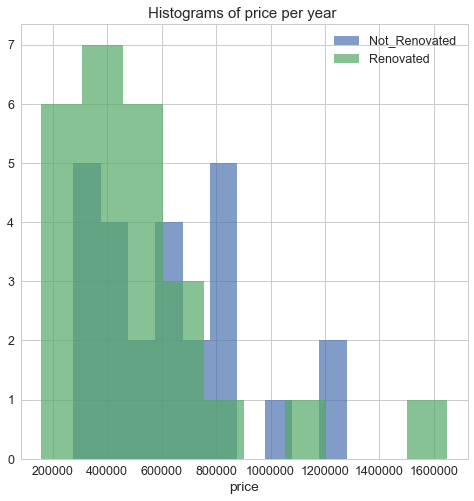

In [654]:
num_samples = 25

Not_Renovated = House_df[ House_df.conv_yr_renovated == 0].sample(n=num_samples) # create a sample of 25 from the original sample
Renovated = House_df[ House_df.conv_yr_renovated == 1].sample(n=num_samples)
pyplot.title('Histograms of price per year ')
Not_Renovated.price.hist(label='Not_Renovated', bins=10, alpha=.7)
Renovated.price.hist(label='Renovated', bins=10, alpha=.7)
pyplot.xlabel('price')
pyplot.legend()

mean_price = numpy.concatenate([Not_Renovated.price, Renovated.price, ]).mean()
print('Mean of heights: %.1f' % mean_price)



In [685]:
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities0
    return post / sum(post) # normalize the distribution to sum to unity

Mean = 504592.000, Standard deviation = 309396.454


C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


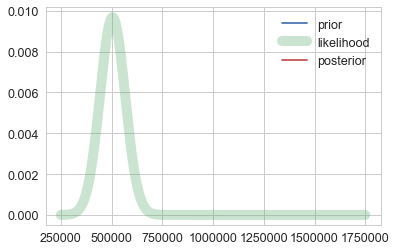

In [686]:
N = 1000
# compute the parameter space. In this case the parameter we're interested in is the mean, so we'll look for means
# in the range or heights between 60 and 75
p = numpy.linspace(250000,1750000, num=N)
# create a prior
# ou prior will look at values around the actual mean with a standard deviation of 5
# visually we can see this is fairly diffuse (less informative prior)
pp = scipy.stats.norm.pdf(p, loc=Renovated.price.mean(), scale=5)
pp = pp / pp.sum() # normalize

# likelihood function-
def comp_like(p, x): 
    # p: parameter space values
    # x: data
    variance = numpy.std(x)**2 # sigmasqr
    x_mean = numpy.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, numpy.std(x)))
    n = len(x)
    l = numpy.exp(-n * numpy.square(x_mean - p) / (2 * variance))
    return l / l.sum()

# compute likelihood and posterior
like_renovated = comp_like(p, Renovated.price)
post_renovated = posterior(pp, like_renovated)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_renovated, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_renovated, label='posterior')
pyplot.legend()

Let's check on Not_Renovated houses using SCIPY library

Mean = 504592.000, Standard deviation = 309396.454


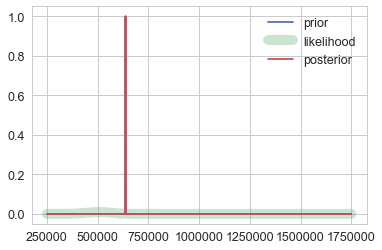

In [687]:
pp_Not_Renovated = scipy.stats.norm.pdf(p, loc=Not_Renovated.price.mean(), scale=5)
pp_Not_Renovated = pp_mom / pp_mom.sum() # normalize

like_Not_Renovated = comp_like(p, Renovated.price)
post_Not_Renovated = posterior(pp_Not_Renovated, like_Not_Renovated)

pyplot.plot(p, pp_Not_Renovated, label='prior')
pyplot.plot(p, like_Not_Renovated, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_Not_Renovated, label='posterior')
pyplot.legend()

In [688]:
num_samples = 10000
lower_q, upper_q = [.025, .975]

def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symmetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    # p: parameter space values 
    # post: posterior distribution
    # num_samples: number of samples to generate from p
    # lower_q: lower percentile of range
    # upper_q: upper percentile of range
    samples = numpy.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='blue')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))

The 0.950 credible interval is 0.025 to 0.975


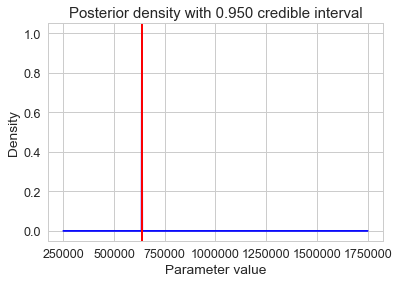

In [689]:
num_samples = 10000

plot_ci(p,post_Not_Renovated, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


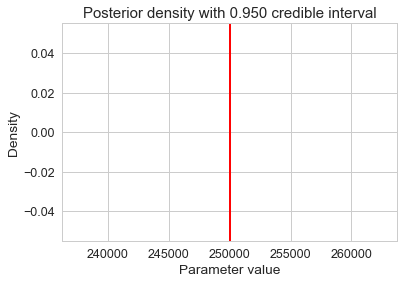

In [690]:
num_samples = 10000

plot_ci(p,post_renovated, num_samples, lower_q=.025, upper_q=.975)

#### After examining the CIs for these posterior distributions, there is no significantly difference between  distributions of the mean of prices for renovated houses and not renovated houses. 

We can drop this column from further calculation.



**Zipcode** Data is not correct from describe table. Let's get some more deatils for zipcode.

In [661]:
House_df['zipcode_str'] = House_df['zipcode'].astype(str)
House_df['zipcode_str'].describe()


count     21612
unique       70
top       98103
freq        601
Name: zipcode_str, dtype: object

In [662]:
Zipcode_count = pd.DataFrame(House_df.groupby('zipcode_str')["price"].agg(['count', 'min', 'max', 'mean']))
Zipcode_count.head()


count       min        max          mean
zipcode_str                                          
98001          362  100000.0   850000.0  2.808047e+05
98002          199   95000.0   389000.0  2.342840e+05
98003          280  128000.0   950000.0  2.941113e+05
98004          317  425000.0  7062500.0  1.355927e+06
98005          168  400000.0  1960000.0  8.101649e+05

In [663]:
print("Most expensive 5 zipcodes....... ")
Zipcode_count.sort_values('mean', ascending=False).head()


Most expensive 5 zipcodes....... 


count       min        max          mean
zipcode_str                                          
98039           50  787500.0  6885000.0  2.160607e+06
98004          317  425000.0  7062500.0  1.355927e+06
98040          282  500000.0  5300000.0  1.194230e+06
98112          269  169317.0  3400000.0  1.095499e+06
98102          105  330000.0  7700000.0  9.012583e+05

In [664]:
print("Most famous 5 zipcodes....... ")
Zipcode_count.sort_values('count', ascending=False).head()


Most famous 5 zipcodes....... 


count       min        max           mean
zipcode_str                                           
98103          601  238000.0  1695000.0  584827.562396
98038          590  110000.0  1350000.0  366867.600000
98115          583  200000.0  2300000.0  619900.547170
98052          574  225000.0  2200000.0  645231.456446
98117          553  125000.0  1370000.0  576795.007233

In [665]:
print("5 zipcodes with highest mean price....... ")
Zipcode_count.sort_values('mean', ascending=False).head()

5 zipcodes with highest mean price....... 


count       min        max          mean
zipcode_str                                          
98039           50  787500.0  6885000.0  2.160607e+06
98004          317  425000.0  7062500.0  1.355927e+06
98040          282  500000.0  5300000.0  1.194230e+06
98112          269  169317.0  3400000.0  1.095499e+06
98102          105  330000.0  7700000.0  9.012583e+05

**Zipcode ** is imporatant feature as price changes with the zip code. There are few area which are more ** populated.**

Converting dates to 1’s and 0’s so that it doesn’t influence our data much . We use 0 for houses which are new that is built after 2014.

In [666]:
conv_dates = [1 if values == 2014 else 0 for values in House_df.date ]
House_df['date'] = conv_dates



Selected Features for models: 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',  'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15' 

## Implementing Regression Models


In [667]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scikits.bootstrap as bootstrap
from sklearn.linear_model import LinearRegression 
from sklearn.cross_validation import train_test_split

In [668]:
# Scale everything but the individual height (child height)
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

#### Scaling the columns

In [669]:

# Add scaled x to data frame
House_df['bedrooms'] = scale(House_df['bedrooms'])
House_df['bathrooms'] = scale(House_df['bathrooms'])
House_df['sqft_living'] = scale(House_df['sqft_living'])
House_df['sqft_lot'] = scale(House_df['sqft_lot'])
House_df['floors'] = scale(House_df['floors'])
House_df['waterfront'] = scale(House_df['waterfront'])
House_df['view'] = scale(House_df['view'])
House_df['condition'] = scale(House_df['condition'])
House_df['grade'] = scale(House_df['grade'])
House_df['sqft_above'] = scale(House_df['sqft_above'])
House_df['sqft_basement'] = scale(House_df['sqft_basement'])
House_df['sqft_living15'] = scale(House_df['sqft_living15'])
House_df['sqft_lot15'] = scale(House_df['sqft_lot15'])
House_df['price'] = scale(House_df['price'])


##### Separating target from independant variables.

In [670]:
X = House_df[['date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',  'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']]

y = House_df['price']
print(X.shape)
print(y.shape)

(21612, 17)
(21612,)


##### split X and y into training and testing sets

In [671]:


from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size =.3)

print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(15128, 17)
(6484, 17)
(15128,)
(6484,)


##### Making a new dataframe using selected columns from train section

In [672]:
data = pd.concat([X_train, y_train], axis=1)
print(data.head())

       date  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
2060      0 -0.406924  -0.149027    -0.587870 -0.213841 -0.915466   -0.087175   
20521     0  0.694446   0.824798     0.675147 -0.171784  0.936460   -0.087175   
8274      0 -0.406924  -1.447460    -1.328260 -0.113021 -0.915466   -0.087175   
21271     0  0.694446   0.500190    -0.359221 -0.249355  0.936460   -0.087175   
17472     0 -0.406924   0.500190     0.272288 -0.143586  0.936460   -0.087175   

           view  condition     grade  sqft_above  sqft_basement  zipcode  \
2060  -0.305767  -0.629146 -0.558853   -0.300003      -0.658642    98038   
20521 -0.305767  -0.629146  1.142623    1.100835      -0.658642    98059   
8274  -0.305767  -0.629146 -1.409591   -1.121185      -0.658642    98146   
21271 -0.305767  -0.629146 -0.558853   -0.046403      -0.658642    98028   
17472 -0.305767  -0.629146  1.142623    0.654016      -0.658642    98006   

           lat     long  sqft_living15  sqft_lot15     p

#### Principal Component Regression on whole dataset

In [673]:
data1 = pd.concat([X, y], axis=1)

In [674]:
# PCR!!
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca =  PCA(n_components=None)
pca_result = pca.fit_transform(X)

column_names = ['pc' + str(ix+1) for ix in range(X.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df['price'] = y


# Here is our data projected onto the four principal components.
print(pca_df.head())
print(pca_df.shape)

          pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  100.076884 -1.397007 -0.184681  0.598833  0.024945  0.414535 -0.097017   
1   47.058930  0.646464 -0.763804  0.473596 -0.040075  0.301411  0.331402   
2  -49.914555 -3.076833  0.076655  0.289837  0.786253  0.750669 -1.187300   
3   58.067112 -0.087103  1.195008 -1.946528 -1.663125 -1.229499  0.862948   
4   -3.933707 -0.799222 -0.358432  0.283209  0.160805  0.479376 -0.386062   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  0.950093 -0.299211  0.147598  0.031069 -0.412951  0.120523 -0.100608   
1 -0.464857  0.374948 -0.111537 -0.022850  0.661746  0.840012  0.135085   
2  0.768021  0.046452 -0.520771  0.655018  1.072682 -0.803786  0.207229   
3 -0.753284  0.510570  0.233802 -0.823364  0.051982 -0.566263 -0.072758   
4  0.663776  0.079191  0.390988 -0.561439 -0.460416 -0.224954  0.071343   

       pc15          pc16  pc17     price  
0  0.108947  4.620652e-16   0.0 -0.866686 

In [675]:
print(pca.explained_variance_)

[  2.86324128e+03   4.51154331e+00   1.72967145e+00   1.61126357e+00
   1.24357382e+00   8.15590721e-01   6.73281214e-01   5.57706041e-01
   5.03516974e-01   2.86364665e-01   2.63355429e-01   2.39395892e-01
   2.25989459e-01   1.68369089e-02   1.15034636e-02   1.49094205e-31
   0.00000000e+00]


In [676]:
var= pca.explained_variance_ratio_
print(var)

[  9.95587657e-01   1.56872453e-03   6.01430120e-04   5.60258101e-04
   4.32407409e-04   2.83591907e-04   2.34108969e-04   1.93921921e-04
   1.75079651e-04   9.95728607e-05   9.15722387e-05   8.32411843e-05
   7.85795865e-05   5.85442056e-06   3.99990962e-06   5.18420682e-35
   0.00000000e+00]


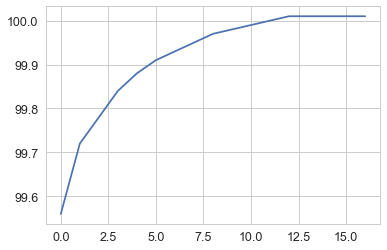

In [677]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()

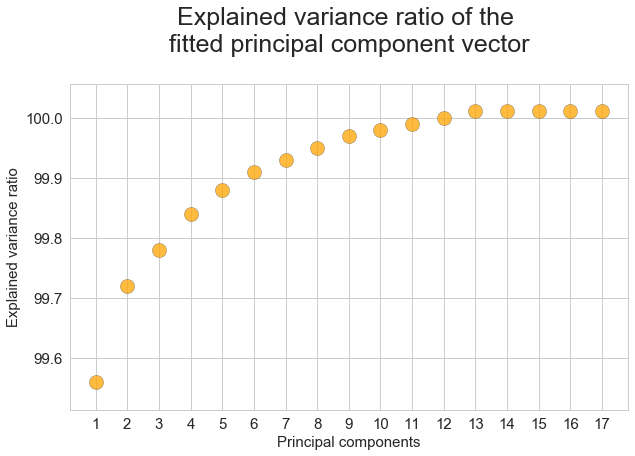

In [678]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(var1))],y=var1,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(var1))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [679]:
print(pca.components_)

[[ -0.00000000e+00  -2.93997187e-03  -3.81537946e-03  -3.73328756e-03
   -2.42381203e-03  -1.10817044e-03   5.65764771e-04   1.58407705e-03
    5.66388706e-05  -3.46046201e-03  -4.88748371e-03   1.39733744e-03
    9.99938796e-01   6.91399798e-04  -1.48476931e-03  -5.22015263e-03
   -2.75367453e-03]
 [  0.00000000e+00   2.78239991e-01   3.82553355e-01   4.34652290e-01
    8.71308394e-02   2.41049020e-01   7.62545562e-02   1.76018227e-01
   -7.07178313e-02   3.92288010e-01   4.02060692e-01   1.49724291e-01
    9.34054187e-03   7.37773046e-03   1.01990870e-02   3.65274774e-01
    9.04810583e-02]
 [ -0.00000000e+00  -8.74719542e-03  -9.93726034e-02   5.32335106e-02
    4.86317691e-01  -3.91204650e-01   2.09231930e-01   2.93972217e-01
    2.91526265e-01  -8.56209256e-02  -1.24815668e-01   3.44009054e-01
    5.17750233e-05  -6.33156162e-03   9.92300977e-04   2.76209741e-02
    4.90334014e-01]
 [ -0.00000000e+00  -2.03887024e-01  -5.14525933e-02  -9.06908976e-02
    4.85557015e-01   2.6239631

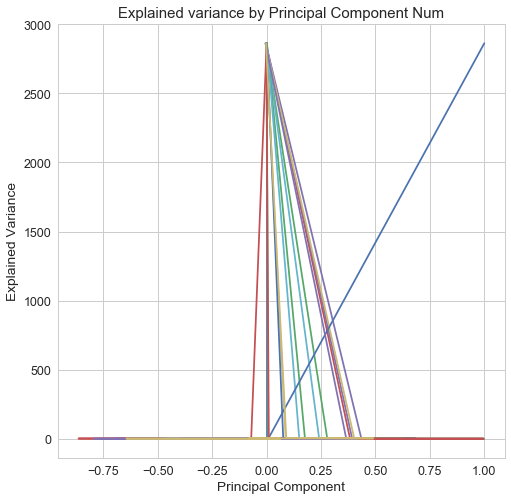

In [680]:
# Plot the explained variance for all 111 principal components
# Note: If the first value is too large, it may dwarf how the rest look.
#   You may consider plotting starting with the 2nd value (python index at 1)
fig = plt.figure(figsize=(8,8))
plt.plot(  pca.components_, pca.explained_variance_  )
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     3237.
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        22:54:56   Log-Likelihood:                -20772.
No. Observations:               21612   AIC:                         4.157e+04
Df Residuals:                   21601   BIC:                         4.165e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.321e-15      0.004  -1.93e-12      1.0

Text(0.5,1,'Residual Histogram')

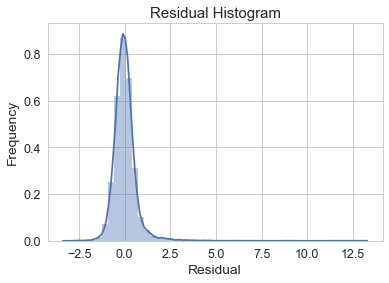

In [697]:
# Perform linear regression with the first N columns
import statsmodels.formula.api as sm
import seaborn as sns
n = 10
#pca_df['price'] = y_train
target_label = 'price'
formula_start = target_label + ' ~ '
formula_terms = ['pc' + str(x+1) for x in range(n)]
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

pcr_model = sm.ols(formula = formula_final, data=pca_df)

results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

#### Summary of your results using PCA model: 
- n= 10 shows okay R-square value 0.600 which means that this model provides a better fit to the data than a model
- PC1.PC4,PC6 and PC7 are negatively associated with 'price' and PC2,PC3,PC5,PC8,PC9 and PC10 are positively associated with 'price'.

###  Linear Model Statistics with all features on training Model

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Intercept, Slopes : 
Intercept       -8.617637e+01
date            -1.391819e-10
bedrooms        -7.241061e-02
bathrooms        7.841235e-03
sqft_living      2.378230e-01
sqft_lot         1.501710e-02
floors          -3.203578e-02
waterfront       1.341367e-01
view             1.172180e-01
condition        8.895083e-02
grade            2.591521e-01
sqft_above       2.201459e-01
sqft_basement    8.163159e-02
zipcode         -1.115434e-03
lat              1.858517e+00
long            -8.769853e-01
sqft_living15    3.695628e-02
sqft_lot15      -2.052285e-02
dtype: float64
Intercept t-value, Slope t-values: 
Intercept        -9.671787
date             -9.671780
bedrooms        -12.425085
bathrooms         1.009903
sqft_living      46.197727
sqft_lot          2.450304
floors           -5.185043
waterfront       27.643958
view             22.001365
condition        18.889092
grade            32.283151
sqft_above       39.839075
sqft_basement    16.099370
zipcode         -10.501995
lat       

Text(0.5,1,'Residual Histogram')

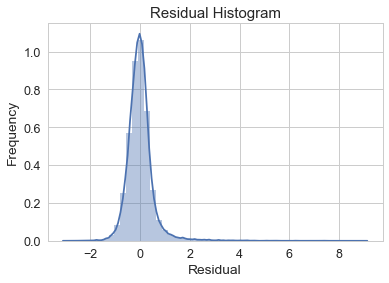

In [698]:
# Linear model stats
ols_model_forward = sm.ols(formula = 'y_train ~ date+ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+zipcode+lat+long+sqft_living15+sqft_lot15', data=data)

results = ols_model_forward.fit()
n_points = data.shape[0]
y_output = data['price'].reshape(n_points, 1)

# Get slope (m) and y-intercept (b)
print('Intercept, Slopes : \n{}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-values: \n{}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print(results.pvalues)

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

In [699]:
# Get predictions
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))


Liner Regression R squared: 0.6767


So, in LinearRegression model, 67.67% of the variability in Y can be explained using X. In other word, an accuracy of 67.67 which is Okay!

Calculate root-mean-square error (RMSE)

In [700]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 0.6164



Our model was able to predict the value of every house in the test set within $6164 of the real price.

Calculate mean absolute error (MAE)

In [701]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 0.3616


#### Summary for the linear model using train and test model :

- r- square is .67 for train model and same for the test model.In other word, an accuracy of both models are 67.67.
- Bedrooms, floors, zipcode, long and SQFT_lot15 shows negative coefficient with price.

I am going to use whole data to calculate all model.
- This is old data from 2014 and 2015. 
- train model and test model shows the same R squre.



#### The final linear regression model includes all features using satsmodel

In [702]:
import statsmodels.formula.api as sm
import seaborn as sns

# create a fitted model with all  features
lm = sm.ols(formula = 'y ~ date+ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+zipcode+lat+long+sqft_living15+sqft_lot15', data=data1).fit()

# print the coefficients
lm.params

Intercept       -8.720974e+01
date            -1.352930e-09
bedrooms        -8.528004e-02
bathrooms        1.092526e-02
sqft_living      2.542630e-01
sqft_lot         2.283632e-02
floors          -3.362559e-02
waterfront       1.392509e-01
view             1.278335e-01
condition        8.977308e-02
grade            2.458017e-01
sqft_above       2.359310e-01
sqft_basement    8.621353e-02
zipcode         -1.153642e-03
lat              1.843501e+00
long            -9.219867e-01
sqft_living15    4.185873e-02
sqft_lot15      -3.077411e-02
dtype: float64

In [703]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     3026.
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        22:55:05   Log-Likelihood:                -18434.
No. Observations:               21612   AIC:                         3.690e+04
Df Residuals:                   21596   BIC:                         3.703e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -87.2097      7.731    -11.280      0.000    -102.363     -72.056
date          -1.353e-09    1.2e-10    -11.280      0.000   -1.59e-09   -1.12e-09
bedrooms         -0.0853      0.005    -16.933      0.000      -0.095      -0.075
bathrooms         0.0109      0.007      1.634      0.102      -0.002       0.024
sqft_living       0.2543      0.004     57.244      0.000       0.246       0.263
sqft_lot          0.0228      0.006      4.080      0.000       0.012       0.034
floors           -0.0336      0.005     -6.287      0.000      -0.044      -0.023
waterfront        0.1393      0.004     32.897      0.000       0.131       0.148
view              0.1278      0.005     27.756      0.000       0.119       0.137
condition         0.0898      0.004     22.027      0.000       0.082       0.098
grade             0.2458      0.007     35.284      0.000       0.232       0.259
sqft_above        0.2359      0.005     49.618      0.000       0.227       0.245
sqft_basement     0.0862      0.004     19.606      0.000       0.078       0.095
zipcode          -0.0012   9.23e-05    -12.495      0.000      -0.001      -0.001
lat               1.8435      0.030     61.901      0.000       1.785       1.902
long             -0.9220      0.036    -25.644      0.000      -0.992      -0.852
sqft_living15     0.0419      0.007      6.286      0.000       0.029       0.055
sqft_lot15       -0.0308      0.006     -5.451      0.000      -0.042      -0.020
==============================================================================
Omnibus:                    17958.097   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1634496.034
Skew:                           3.466   Prob(JB):                         0.00
Kurtosis:                      45.036   Cond. No.                     5.90e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.97e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### What are a few key things we learn from this output?

- bathrooms,date,lat,grade,sqft_lot, sqft_above, sqft_basement, condition,view, waterfront, floor and sqft_living have significant p-values (positively associated with Price), whereas bedroom ,zipcode,long, floor and sqft_lot15 does not. 
- This model has a almost same R-squared (0.68) like the previous model, which is almost same as above model.

### Regular regression

In [704]:
ols_model = sm.ols(formula = 'price ~ date+ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+zipcode+lat+long+sqft_living15+sqft_lot15', data=data1)

results = ols_model.fit()
n_points = data.shape[0]
y_output = data['price'].values.reshape(n_points, 1)

reg_slope = results.params[1]
reg_intercept = results.params[0]
print('\nRegular Regression:')
print('\n  -Slope: {}'.format(reg_slope))
print('\n  -Intercept: {}'.format(reg_intercept))

#reg_y_fit = [reg_slope * xi + reg_intercept for xi in x]

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())


Regular Regression:

  -Slope: -1.3529299850537844e-09

  -Intercept: -87.20974192168728

SSE, SST, SSR, and RMSE:
SSE: 7022.632585909236
SST: 13990.114050084372
SSR: 6967.481464175136
RMSE: 31.245819491920226
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     3026.
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        22:55:06   Log-Likelihood:                -18434.
No. Observations:               21612   AIC:                         3.690e+04
Df Residuals:                   21596   BIC:                         3.703e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         

Regular regression shows exact same data as linear regression.

- bathrooms,date,lat,grade,sqft_lot, sqft_above, sqft_basement, condition,view, waterfront, floor and sqft_living have   significant p-values (positively associated with Price), whereas bedroom ,zipcode,long, floor and sqft_lot15 does not. 
- This model has a almost same R-squared (0.68) like the previous model, which is almost same as above model.

###  Lasso Regression

In [705]:
price = data.loc[:,'price'] 

In [706]:
# Lasso Regression with a sequence of lambdas
# Generate a sequence of lambdas
log_lambda_seq = np.linspace(-6, 2, 50)
lambda_seq = np.exp(log_lambda_seq)

coeffs_array = []
rsq_array = []

formula = 'price ~ date+ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+zipcode+lat+long+sqft_living15+sqft_lot15 + 1'

for lamb in lambda_seq:
    ridge_model = sm.ols(formula, data = data).fit_regularized(method='elastic_net', alpha=lamb, L1_wt=1)
    coeffs_array.append(list(ridge_model.params))
    predictions = ridge_model.fittedvalues
    residuals = [x - y for x, y in zip(np.squeeze(predictions), price)]

    SSR = np.sum(np.square(residuals))

    SST = np.sum(np.square(price - np.mean(price)))


    rsq = 1 - (SSR / SST)
    rsq_array.append(rsq)

Text(0.5,0,'Log-Lambda')

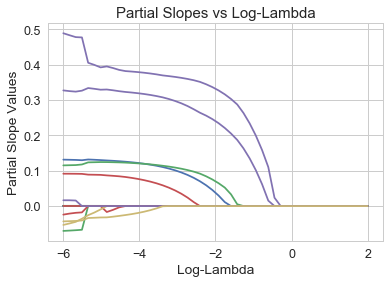

In [707]:
# Pull out partial slopes (drop intercept version)
beta_coeffs = [x[1:] for x in coeffs_array]
plt.plot(log_lambda_seq, beta_coeffs)
plt.title('Partial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')

Text(0,0.5,'Partial Slopes')

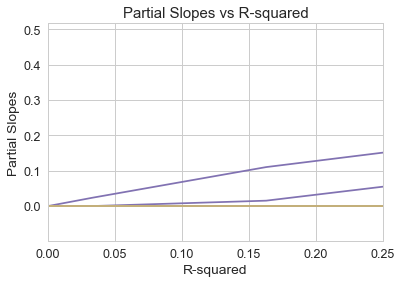

In [708]:
# Plot partial slopes vs R squared (% deviance explained)
plt.plot(rsq_array, beta_coeffs)
plt.xlim([0.0, 0.25])
plt.title('Partial Slopes vs R-squared')
plt.xlabel('R-squared')
plt.ylabel('Partial Slopes')


Notice that model coefficients are much more tightly constrianed. In fact, only two of the possible model coefficients have non-zero values at all. This is typical of L1 or lasso regression.

#### Elastic net regression

In [709]:
# Elasticnet Regression with a sequence of lambdas
# Generate a sequence of lambdas
log_lambda_seq = np.linspace(-6, 0, 50)
lambda_seq = np.exp(log_lambda_seq)

coeffs_array = []
rsq_array = []
formula = 'price ~ date+ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+zipcode+lat+long+sqft_living15+sqft_lot15 + 1'


for lamb in lambda_seq:
    ridge_model = sm.ols(formula, data=data).fit_regularized(method='elastic_net', alpha=lamb, L1_wt=0.75)
    coeffs_array.append(list(ridge_model.params))
    predictions = ridge_model.fittedvalues
    residuals = [x - y for x, y in zip(np.squeeze(predictions), price)]

    SSR = np.sum(np.square(residuals))
    SST = np.sum(np.square(price - np.mean(price)))

    rsq = 1 - (SSR / SST)
    rsq_array.append(rsq)

Text(0.5,0,'Log-Lambda')

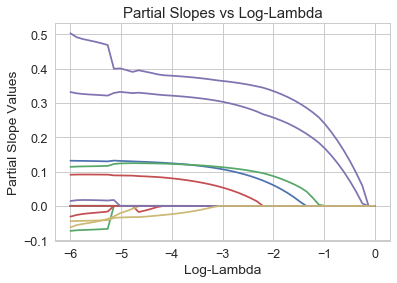

In [710]:
 #Pull out partial slopes (drop intercept version)
beta_coeffs = [x[1:] for x in coeffs_array]
plt.plot(log_lambda_seq, beta_coeffs)
plt.title('Partial Slopes vs Log-Lambda')
plt.ylabel('Partial Slope Values')
plt.xlabel('Log-Lambda')

Text(0,0.5,'Partial Slopes')

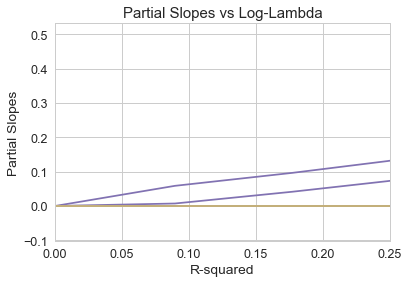

In [711]:
# Plot partial slopes vs R squared (% deviance explained)
plt.plot(rsq_array, beta_coeffs)
plt.xlim([0.0, 0.25])
plt.title('Partial Slopes vs Log-Lambda')
plt.xlabel('R-squared')
plt.ylabel('Partial Slopes')

#### Resample Residuals (Non-Parametric Bootstrapping) 

In [712]:
from sklearn.linear_model import LassoCV
#Ridge regression
lm_Lasso = LassoCV(cv=3)
lm_Lasso.fit(X_train.iloc[:,:-1], y_train)
lm_Lasso.score(X_train.iloc[:,:-1], y_train)
print (lm_Lasso.coef_)
print (lm_Lasso.intercept_)
print (lm_Lasso.alpha_)

[  0.00000000e+00  -6.28449389e-02   0.00000000e+00   4.19587051e-01
  -0.00000000e+00  -2.09081730e-02   1.32825129e-01   1.16207787e-01
   8.77299408e-02   2.68981068e-01   3.83788059e-02   0.00000000e+00
  -7.13488109e-04   1.69461352e+00  -6.41335337e-01   3.10504185e-02]
-89.0037364768
0.00280614414357


### Future

It is obvious that some of the important features were not included in my model, such as kitchen, pool, style of the house, roof style and land slope. With more features and more data, better prediction can be made.

Forecasting is very important for the real estate market. By combining economic data, it is possible to give a forecasting of the price in the future.